In [1]:
import scipy.io
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math
import numpy as np

In [2]:
head1 = scipy.io.loadmat('/Users/cmdb/Desktop/GORDUS_rotation/ASJ_neuron_stuff/NeuroPAL data/Whole-Brain Calcium Activity/Young Adults/Head_Activity_OH16230.mat')
# 21 Heads, healthier than other strain 

#head2 = scipy.io.loadmat('/Users/lotus/Desktop/Python/NeuroPAL data/Whole-Brain Calcium Activity/Young Adults/Head_Activity_OH15500.mat')
# 7 Heads, unhealthy :(

tail1 = scipy.io.loadmat('/Users/cmdb/Desktop/GORDUS_rotation/ASJ_neuron_stuff/NeuroPAL data/Whole-Brain Calcium Activity/Young Adults/Tail_Activity_OH16230.mat')
# 21 Tails

In [3]:
# Here I want to pull out ASJ left and right

def LR_Traces(array, searchterm, left_right): #enter neuron search of interest, choose 'left' or 'right'
    
    neuron_number = [] #make empty array to save to first
    
    for i in range(0, len(array['neurons'])): #search for list of neuron names, for head it's 109 names
        if searchterm in array['neurons'][i]: #'in' function can see if something is contained in list
            neuron_number = i #output the index number, i, which tells you what index corresponds to neuron name
    
    if neuron_number == []: #if there is no matching number, which means that it can't find the neuron, then the 
        #list will be blank, so then it will produce an 'Error' message and stop this function here.
        return 'Error'
    
    traces = array['traces'][neuron_number][0][0] #this is just to pull out the traces/data

    L = []
    R = []
    nans = []

    is_L = array['is_L'][neuron_number][0][0] #this is to find if the neuron is Left or Right

    for i in range(0,len(is_L)): #loop through the L/R list, which is either 1, 0, or nans if there's no L/R neuron
        if is_L[i] == 1: # 1 = Left neuron
            L.append(traces[i][0][4:-1]) #exclude nans which are in the beginning (4 nans) and 1 nan at the end
        if is_L[i] == 0: # 0 = Right neuron
            R.append(traces[i][0][4:-1])
        if math.isnan(is_L[i]): #nans = no Left or Right
            nans.append(traces[i][0][4:-1])
        #Notice that here the 'i' value represents the values in the is_L array, meaning that it's looping through 
        # either 42 or 21 numbers. That means that the corresponding traces[i] value will match the 42/21 trials
        # for that neuron.
    
    if left_right == 'left': #Here you can choose which side neuron you want
        return L
    if left_right == 'right':
        return R
    if left_right == 'neither': #if you know ahead of time that it only has one side, choose 'neither'
        return nans
    
ASJ_L = LR_Traces(head1, 'ASJ', 'left') #here I want to separate ASJ L and R, and I already know they're in the head
ASJ_R = LR_Traces(head1, 'ASJ', 'right')
print(ASJ_L[0])

[ 6.90818406e-01  5.86380876e-01  5.37359692e-01  4.78142197e-01
  4.66353615e-01  4.38721445e-01  3.18877579e-01  3.95282985e-01
  3.47122870e-01  3.67482163e-01  3.12360783e-01  2.64939809e-01
  2.11510286e-01  2.51549392e-01  2.00490782e-01  1.90485174e-01
  1.87534201e-01  2.33617065e-01  1.67440226e-01  2.35011677e-01
  1.41061998e-01  1.62383111e-01  1.10723309e-01  1.09625558e-01
  1.53213472e-01  6.67231495e-02  1.03311066e-01  3.61611684e-02
  6.25018353e-02  3.70225298e-02  8.22124910e-02  6.88280374e-02
  4.38999968e-02  8.83978710e-02  9.47295571e-02  8.72508274e-02
  5.85982615e-02  4.10929427e-02  7.64450052e-02 -9.84067007e-03
  3.99465524e-02  6.30122857e-02  7.92969325e-02  2.39992192e-02
  9.07714216e-02  1.16144575e-01  1.02743579e-01  9.85073087e-02
  2.51663879e-01  1.70769311e-01  1.58590021e-01  1.19652003e-01
  1.16087178e-01  1.35985023e-01  1.18285636e-01  1.34171650e-01
  6.47462136e-02  4.06563723e-02  5.25958410e-02  4.75196119e-02
  1.07949059e-01 -2.15780

In [7]:
def Neurons_list(heads_tails, names_traces): #this will make a master list of the neuron names and their traces
    if heads_tails == 'heads': #you can choose which dataset you want, heads or tails
        array = head1
    if heads_tails == 'tails':
        array = tail1
        
    names_temp = [] #want to make a temporary list to save to
    traces_temp = []

    for i in range(len(array['neurons'])): #here it will loop through the list of neuron names
        name = array['neurons'][i][0][0] #want to save the names as a variable to be easier to access
        #the reason that some things have a lot of [0] is because the format of their data has many nested
        # arrays, so this was just something to add to call the correct thing
        trace = array['traces'][i][0][0] #same thing here, but with the traces data
        is_L = array['is_L'][i][0][0] #same thing here, but for the L/R data
        for j in range(0,len(is_L)): #now this nested loop will be going through the is_L list 
            if is_L[j] == 1: # 1 = Left neuron
                names_temp.append(name + 'L') #here you can add the letter 'L' to the end of the name
                traces_temp.append(trace[j][0][4:-1])#exclude nans, which are 4 nans in beginning, 1 nan at end
            if is_L[j] == 0: # 0 = Right neuron
                names_temp.append(name + 'R')
                traces_temp.append(trace[j][0][4:-1])
            if math.isnan(is_L[j]): # nans = no left or right neuron
                names_temp.append(name + '') #this adds nothing to the end of the name, you could also just delete + ''
                traces_temp.append(trace[j][0][4:-1])
    #notice here that the i value represents the length of the entire list of neurons, for example heads is 109
    # and notice here that j value represents the length of the is_L function, if there's a L/R neuron, 
    # then is_L = 42, if there's no L/R pair, then is_L = 21
    # We already have a variable saved for the trace variable which is calling array['traces'][i] using i
    # this represents the SET of traces for each neuron (one set would be either 42 or 21 traces)
    # Then the second loop we are appending trace[j] with the j variable.
    # this represents the INDIVIDUAL traces INSIDE the SET (so now it will loop through each 42 or 21 trace individually)
    # If you write out the full thing you're saving, then it actually looks like this:
    # array['traces'][i][j] (ignore all the weird [0] parts for simplification)
    # if we wanted trace 19 from neuron 3 for example, then it would look like
    # array['traces'][3][19]
    # but also notice that for appending the names, i'm basically just appending array['neurons'][i]
    # because that's corresponding to the list of neuron names. so if we use the same example for neuron 3,
    # it would be array['neurons'][i]

    names = [] #want to remove the duplicates
    for i in names_temp: # the names_temp basically looks like 'neuronL','neuronL','neuronL', etc and 'neuronR','neuronR'
        #etc, so we want to simplify the list to just be ['neuronL', 'neuronR']
        if i not in names: # 'not in' is a useful function to exclude things in a list
            names.append(i) #basically if the name already exists in the list, we don't save it, but if it's 'not in'
            #the list, then we can save it, that way the list is all unique names
    
    traces = np.reshape(traces_temp,(len(names),21)) 
    # reshape is a function to basically take a big array and tell the dimensions that you want to reshape to
    # because the length of the names corresponds to how many traces SETS we have, we can use that variable as a number
    # and we already know that one SET has 21 
    
    if names_traces == 'names': #here you can choose whether you want the list of names or the traces data
        return names
    if names_traces == 'traces':
        return traces

head_names = Neurons_list('heads', 'names')
head_traces = Neurons_list('heads', 'traces')

tail_names = Neurons_list('tails', 'names')
tail_traces = Neurons_list('tails', 'traces')

print(head_names)
print(len(head_traces))
#print(head_traces[0]) #file is too big to print all the traces lol, so just print the 1st one to make sure it works

print(tail_names)
print(len(tail_traces))
#print(tail_traces[0])

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (3969,) + inhomogeneous part.

In [5]:
## Correlate ASJ with all neurons

def Correlate(neuron1, neuron2): #neuron 1 is the list of neurons, neuron2 is ASJ L or R

    corrs = np.empty((len(neuron1), 21)) #I want to make an empty array the size of the length of all the neurons,
    # and the width is 21 trials
    corrs[:] = np.nan #fill that empty array with nans, I don't want to use zeros because it will create artificial
    # 0 for the correlation numbers. Also useful to have nans, because nans don't get plotted for graphs

    for i in range(0,len(neuron1)): #loop through the length of all neurons
        for j in range(0, 21): #within that loop, loop through each 21 trial/trace
            try: #using try, except, and continue together is useful because if something doesn't work, it will
                #just skip instead of 'breaking' the loop and just not working at all
                length = len(neuron1[i][j]) #I want to check how long the neuron trace is
                # for example, if neuron 1 is 931 but neuron 2 is 955, the corrcoef doesn't work
                # so i can cut off the length of each neuron to cap it at 931. that's what [:length] does
                # now both are matched to be 931
                corr = np.corrcoef(neuron1[i][j][:length], neuron2[j][:length])
                #notice how neuron1[i][j] means that for neuron 1 number i, i want trace number j (j is from 0-21)
                #but for neuron2[j], it is a shorter list with just 21 traces (ASJ L/R)
                corrs[i][j] = corr[0][1]
                # now save that value in the corrs list of nans. corrs[i][j] will now correspond with the location
                # of neuron1[i][j]. the corr[0][1] is just a weird part of the corrcoef function - this location
                # just refers to the actual correlation value
            except: #this means if the criteria above don't match (like if it runs into nans or an empty trace)
                continue # then just skip it
            
    return corrs

corr_head_ASJ_L = Correlate(head_traces, ASJ_L)
corr_head_ASJ_R = Correlate(head_traces, ASJ_R)

corr_tail_ASJ_L = Correlate(tail_traces, ASJ_L)
corr_tail_ASJ_R = Correlate(tail_traces, ASJ_R)

#print(corr_head_ASJ_L)

NameError: name 'head_traces' is not defined

In [44]:
# I realized that since you want the top 10 hits of ALL neurons (heads and tails), then we should combine everything
# Now we'll just keep the ASJL data and ASJR data separated, but combine heads and tails for each

#you can simply use the + to combine simple lists
all_names = head_names+tail_names
all_traces_L = np.concatenate((corr_head_ASJ_L, corr_tail_ASJ_L))
all_traces_R = np.concatenate((corr_head_ASJ_R, corr_tail_ASJ_R))

print(len(head_names))
print(len(tail_names))
print(len(all_names))

#for complicated arrays you can use numpy concatonate
all_names = head_names+tail_names
all_traces_L = np.concatenate((corr_head_ASJ_L, corr_tail_ASJ_L))
all_traces_R = np.concatenate((corr_head_ASJ_R, corr_tail_ASJ_R))

print(len(corr_head_ASJ_L))
print(len(corr_tail_ASJ_L))
print(len(all_traces_L))

189
42
231
189
42
231


In [45]:
def Ranking(array, names, choice): 
    ranked = np.zeros((len(names), 21)) #make empty array the length of all neurons, by 21 trials
    name = []
    medians = []
    true_medians = []
    ranked_meds = []
    absolute_meds = []

    for i in array: #loop through array
        med = np.nanmedian(i) #nanmedian is a special function that will take the medians and ignore nans
        # we want the median value of the correlation values because medians will exclude weird outliers
        # we also want the medians because each 21 trial corresponds to each neuron, so we can take the 
        # median of that so that we just have 1 median value per neuron to rank
        medians.append(abs(med)) #append the absolute value, because we want to make negative numbers positive
        # we want the overall highest number for ranking, regardless of positive/negative, 0 means no correlation
        true_medians.append(med)
        
    sort = np.sort(medians) #sort function sorts numbers from lowest to highest
    reverse_sort = sort[::-1] #here we can reverse that sort list to be highest rank to lowest

    for i in range(0,len(names)): # loop through everything
        where = np.where(reverse_sort[i] == medians) 
        # where function is useful for finding the index number. here I want to find where the value of 
        # the reverse_sort ranking matches the values of the medians
        # the reverse_sort is ranked by highest correlation, but the medians list has maintained the order of 
        # the neurons list values, so we want to know where they match to find the index of the neuron value
        # ex: if my highest ranking neuron (reverse_sort[0]) is actually neuron # 97, then I want to know the index
        # number of 97
        num_where = where[0][0] #the where function is written weird so I'm just reformatting it here
        ranked[i] = (array[num_where]) #now I can save the location of the neuron order to 'ranked'
        name.append(names[num_where]) #and I can also save the name order to match
        ranked_meds.append(true_medians[num_where])
        absolute_meds.append(medians[num_where])
        
    if choice == 'names':
        return name
    if choice == 'correlations':
        return ranked
    if choice == 'medians': #this will be ranked based on absolute value, but I don't think you need it anymore
        return absolute_meds
    if choice == 'true medians': #this is ranking with their true values
        return ranked_meds

rank_ASJ_L = Ranking(all_traces_L, all_names, 'correlations')
#print(rank_ASJ_L)
rank_ASJ_L_names = Ranking(all_traces_L, all_names, 'names')
print(rank_ASJ_L_names)
rank_ASJ_L_meds = Ranking(all_traces_L, all_names, 'true medians')
#print(rank_ASJ_L_names[:10]) #if you want just top 10 hits

rank_ASJ_R = Ranking(all_traces_R, all_names, 'correlations')
rank_ASJ_R_names = Ranking(all_traces_R, all_names, 'names')
rank_ASJ_R_meds = Ranking(all_traces_R, all_names, 'true medians')
print(rank_ASJ_R_names)

['ASJL', 'ASJR', 'AUAL', 'AWCL', 'AIAR', 'AIZL', 'AVDL', 'SMBVL', 'RIFL', 'RICR', 'AUAR', 'ASHR', 'AWBR', 'DD1', 'ASHL', 'SABVL', 'RMHL', 'AVL', 'VD1', 'AIYR', 'SAADL', 'AWCR', 'ADAL', 'NSML', 'ADFL', 'ALNR', 'SIADR', 'ASKR', 'SIBDL', 'CEPDL', 'AINR', 'SMBDL', 'SABVR', 'RMDL', 'SAADR', 'RIAR', 'IL1VR', 'CEPVR', 'VA1', 'NSMR', 'SIAVL', 'RMFL', 'RMDDL', 'M3L', 'I2R', 'AIAL', 'PVCL', 'AVDR', 'RMHR', 'AIML', 'M3R', 'URXR', 'I3', 'IL2DL', 'ADEL', 'AVJR', 'AVFR', 'I5', 'IL1DR', 'PLNR', 'AVKR', 'AIBL', 'MCL', 'MI', 'PVR', 'URXL', 'PVCR', 'ADLR', 'AIZR', 'ASGL', 'IL2VR', 'AIBR', 'AVEL', 'PVWR', 'RMFR', 'ASKL', 'AVHL', 'RICL', 'AQR', 'RMDVR', 'ADFR', 'AVFL', 'RIGL', 'M2R', 'I2L', 'PVWL', 'RMGL', 'VD11', 'LUAL', 'OLQDL', 'RIPR', 'PVNL', 'PHCL', 'LUAR', 'SAAVL', 'DVB', 'IL2DR', 'AIMR', 'AINL', 'MCR', 'SAAVR', 'AVJL', 'RIML', 'AVG', 'IL1VL', 'ADER', 'DB2', 'RIGR', 'M2L', 'RIS', 'CEPDR', 'URADL', 'FLPL', 'RMDDR', 'M4', 'IL2R', 'DVC', 'M5', 'RIAL', 'I1R', 'IL1L', 'RMEV', 'DA7', 'ALNL', 'RMDVL', 'AS1

In [46]:
# Let's cut off the data for just the top 10 hits

top10_rank_ASJ_L = rank_ASJ_L[0:12]
#print(top10_rank_ASJ_L)
top10_rank_ASJ_L_names = rank_ASJ_L_names[0:12] 
print(top10_rank_ASJ_L_names)

#I noticed that the top 2 hits are with itself (ASJL and ASJR) lol, so we can use [2:12] instead of [:10]
#BUT if you want to show that the top 2 hits are with itself, then use the [:10], idk if Andrew would want to 
#show that, because it's actually a good control and proof of concept to show that the ranking system works lol :) 

# ------- #
# Okay I plotted the original top10 hits, but I noticed 2 of them were strange for ASJ R dataset
#if you use [2:12] then it's index 0 and 3 that are strange
#if you use [:10] then it would be index 2 and 5
#make sure you match the index below accordingly based on if you use [2:12] or [:10]
# so the new index is going to ignore these 2, but if you want to plot it then you can just use [2:12] or [:10]

top10_rank_ASJ_R = np.concatenate((rank_ASJ_R[:2] , rank_ASJ_R[3:5], rank_ASJ_R[6:14])) #this is for [2:12]
#If you want index for [:10] then it would be [:2] + [3:5] + [6:12]
#print(top10_rank_ASJ_R)

top10_rank_ASJ_R_names = rank_ASJ_R_names[:2] + rank_ASJ_R_names[3:5] + rank_ASJ_R_names[6:14]
print(top10_rank_ASJ_R_names)


['ASJL', 'ASJR', 'AUAL', 'AWCL', 'AIAR', 'AIZL', 'AVDL', 'SMBVL', 'RIFL', 'RICR', 'AUAR', 'ASHR']
['ASJR', 'ASJL', 'SIAVL', 'RMFL', 'RMHR', 'AIML', 'RMFR', 'AUAL', 'SMBVL', 'ASKR', 'I2R', 'AUAR']


In [63]:
# If you want to know if the neuron is in the head or tail, since we ended up combining everything, we can
# use this simple code 

location_L = []

for i in top10_rank_ASJ_L_names:
    if i in head_names:
        location_L.append('Head')
    else:
        location_L.append('Tail')
        
print(location_L)

location_R = []

for i in top10_rank_ASJ_R_names:
    if i in head_names:
        location_R.append('Head')
    else:
        location_R.append('Tail')
        
print(location_R)

['Head', 'Head', 'Head', 'Head', 'Head', 'Head', 'Head', 'Head', 'Head', 'Head', 'Head', 'Head']
['Head', 'Head', 'Head', 'Head', 'Head', 'Head', 'Head', 'Head', 'Head', 'Head', 'Head', 'Head']


    ASJL      ASJR      AUAL      AWCL      AIAR      AIZL      AVDL  \
0    1.0  0.597060  0.284202  0.626532  0.265573  0.069065  0.513029   
1    1.0  0.960459  0.777212  0.673665 -0.051258  0.449398  0.350145   
2    1.0  0.451397  0.716682  0.525983  0.749567  0.067532  0.437186   
3    1.0  0.573637  0.590277  0.557577  0.421513  0.464448  0.618182   
4    1.0 -0.072444  0.206931  0.294928  0.551787  0.704183  0.502362   
5    1.0  0.674134  0.518151  0.499294  0.563947  0.686145  0.233152   
6    1.0       NaN  0.176953  0.324520  0.198064  0.469530  0.114702   
7    NaN       NaN       NaN       NaN       NaN       NaN       NaN   
8    1.0  0.709118  0.463569  0.486848       NaN  0.783547  0.695473   
9    1.0  0.072310  0.706979  0.404678  0.344627 -0.273575  0.261804   
10   1.0  0.500077 -0.171052 -0.200318 -0.011586  0.689160  0.945908   
11   1.0  0.568954 -0.390532  0.586332 -0.057513  0.080715  0.349135   
12   NaN       NaN       NaN       NaN       NaN       NaN      

/Users/lotus/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 57.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/lotus/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 57.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/lotus/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 57.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/lotus/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 57.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/lotus/opt/anaconda3/lib/python3.9/site-packages/s

    ASJR      ASJL     SIAVL      RMFL      RMHR      AIML      RMFR  \
0    1.0  0.597060       NaN  0.417664  0.519428  0.389881  0.374924   
1    1.0  0.960459 -0.596079  0.346998  0.201979  0.446583  0.101210   
2    1.0  0.451397  0.541162  0.050336       NaN  0.517875  0.540322   
3    1.0  0.573637  0.399587  0.221326  0.164386 -0.077995  0.180309   
4    1.0 -0.072444 -0.196315  0.889399 -0.422549 -0.238795  0.895411   
5    1.0  0.674134  0.726557  0.738540  0.418223  0.756963  0.724768   
6    NaN       NaN       NaN       NaN       NaN       NaN       NaN   
7    1.0       NaN  0.451018  0.488045  0.509513  0.315045  0.449695   
8    1.0  0.709118  0.777189  0.534269  0.573187 -0.258930  0.813333   
9    1.0  0.072310  0.370349  0.269556  0.395511  0.010573  0.324482   
10   1.0  0.500077  0.598282 -0.270475       NaN -0.327300 -0.002082   
11   1.0  0.568954  0.054775  0.265534  0.178240  0.395157  0.325997   
12   1.0       NaN  0.576882  0.214520  0.581374  0.390163  0.42

/Users/lotus/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 71.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/lotus/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 71.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/lotus/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 71.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/lotus/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 71.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/lotus/opt/anaconda3/lib/python3.9/site-packages/s

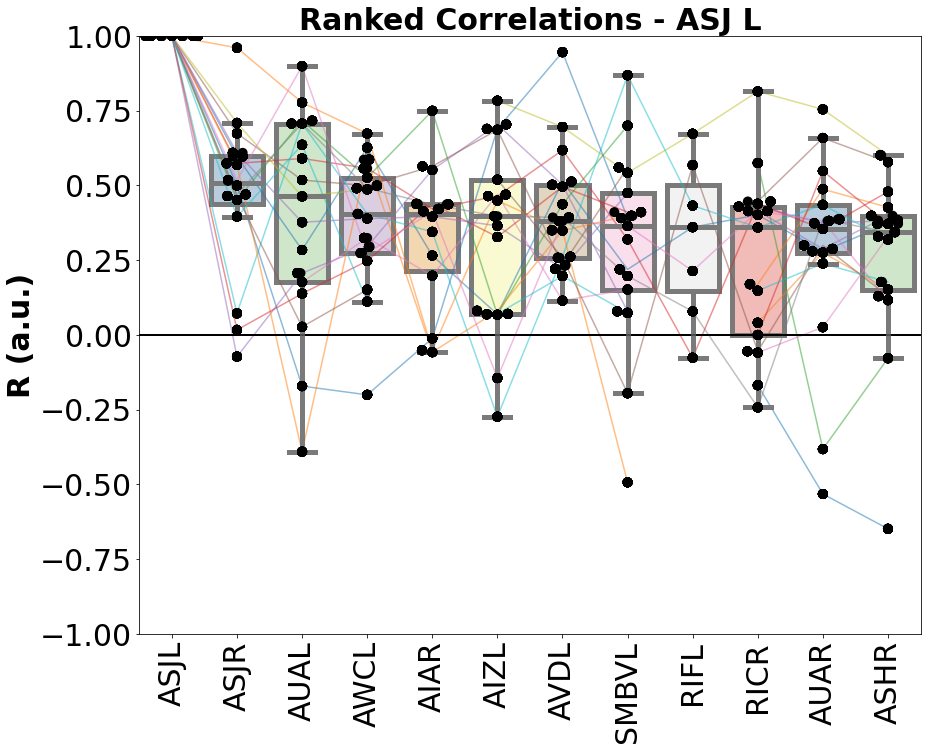

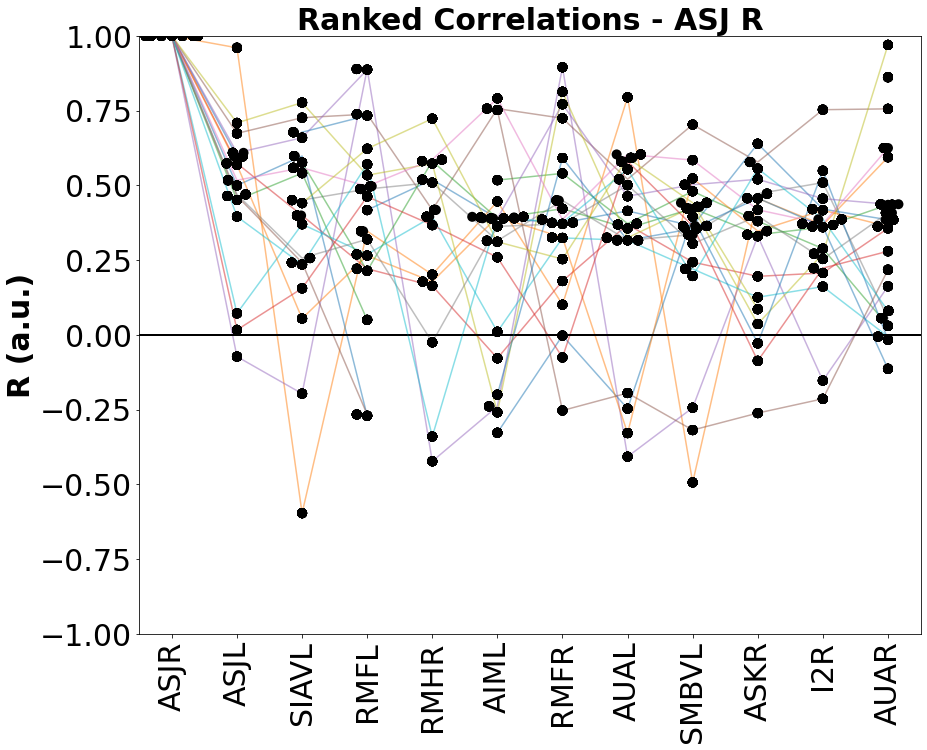

In [47]:
## This is plotting the top 10

dF_L = pd.DataFrame(top10_rank_ASJ_L.T, columns=top10_rank_ASJ_L_names) #make a pandas dataframe-easier for plotting
#Notice that I used .T, that transposes things to make them inverted (I have no idea why, but plotting boxplots 
#makes things inverted for some reason...)
print(dF_L)

colors1 = sns.color_palette("Pastel1") #If you look up 'matplotlib colormap reference' you can find a list of
# colormaps to choose from to get different colors :)

count=0 #this is how I get those lines to connect each 21 trial across the neurons
fig, ax = plt.subplots(1,1, figsize=(14,11), facecolor='w') #this establishes the plotting
for i in top10_rank_ASJ_L.T: #this is for plotting those lines basically, normally you don't need to loop to plot
    ax.set_title('Ranked Correlations - ASJ L', fontsize=30, weight='bold') #title
    sns.boxplot(data=dF_L, palette=colors1, linewidth = 5) #this is for the boxplot and how I use the colormaps
    sns.swarmplot(data=dF_L, size=10, color='black') #plot each individual trial dot using swarmplot
    ax.plot(i, alpha=0.5) #this is for plotting those connecting lines, you can comment out if you don't want it
    plt.xticks(rotation=90) 
    ax.set_ylabel('R (a.u.)', fontsize=30, weight='bold')
    ax.tick_params(axis= 'both', labelsize=30)
    ax.set_ylim([-1,1])
    plt.axhline(y=0, color='black', alpha=0.5) #I drew a black line for number 0 because that shows no correlation
    count += 1 #this part is just for looping through to plot those lines
    #plt.savefig('031424 ASJ L Ranked Correlations.png') #here you can save your figure

    
# Repeat the same things for ASJ R    
dF_R = pd.DataFrame(top10_rank_ASJ_R.T, columns=top10_rank_ASJ_R_names)
print(dF_R)

colors2 = sns.color_palette("Pastel2")

count=0
fig, ax = plt.subplots(1,1, figsize=(14,11), facecolor='w')
for i in top10_rank_ASJ_R.T:
    ax.set_title('Ranked Correlations - ASJ R', fontsize=30, weight='bold')
    sns.boxplot(data=dF_R, palette=colors2, linewidth = 5)
    sns.swarmplot(data=dF_R, size=10, color='black')
    ax.plot(i, alpha=0.5)
    plt.xticks(rotation=90)
    ax.set_ylabel('R (a.u.)', fontsize=30, weight='bold')
    ax.tick_params(axis= 'both', labelsize=30)
    ax.set_ylim([-1,1])
    plt.axhline(y=0, color='black', alpha=0.5)
    count += 1
    #plt.savefig('031424 ASJ R Ranked Correlations.png')
    

/Users/lotus/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 76.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/lotus/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 19.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/lotus/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 9.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/lotus/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/lotus/opt/anaconda3/lib/python3.9/site-packages/se

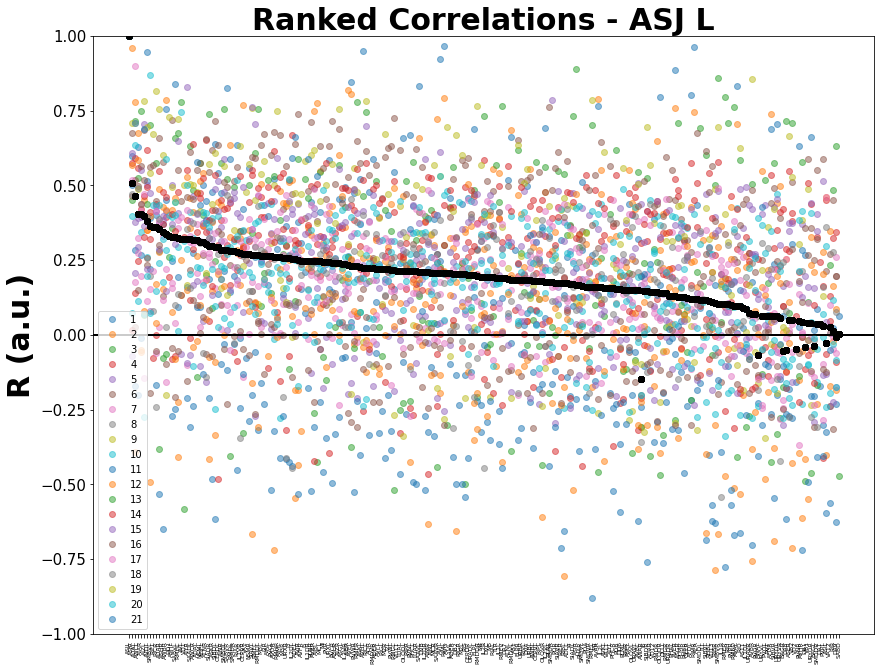

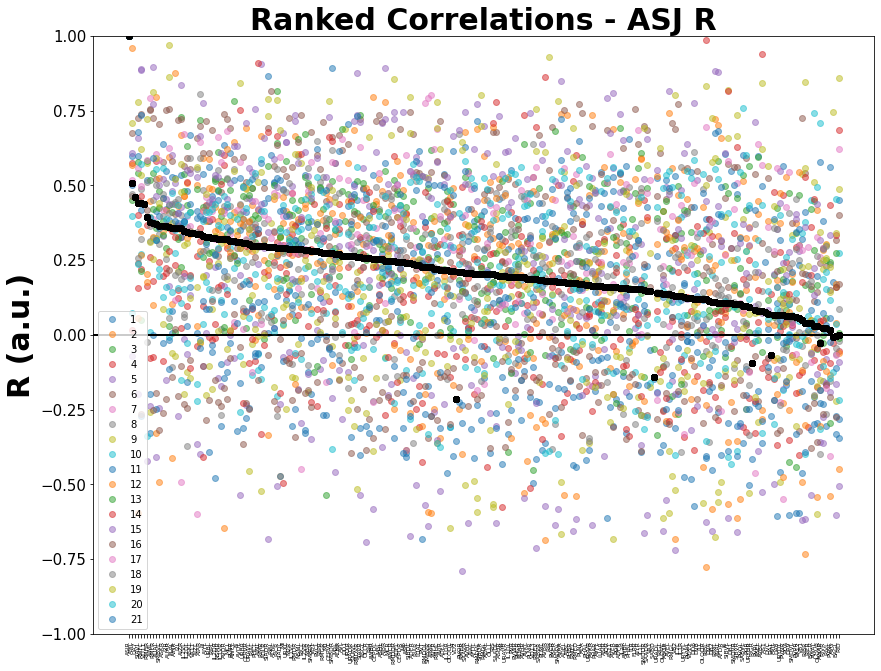

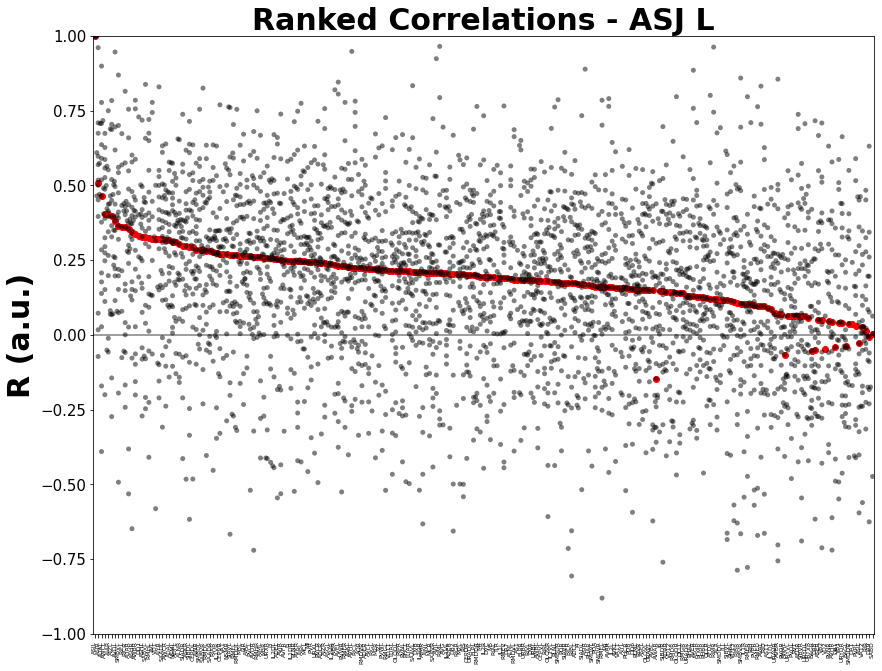

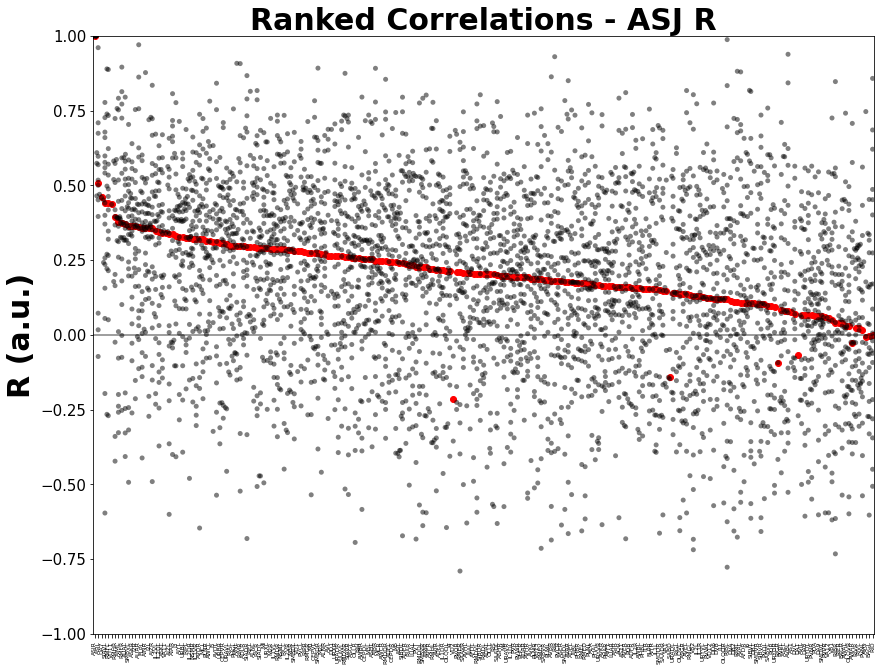

In [48]:
# This is plotting ALL the correlations, and I added the medians as a red color to show
# COLORFUL VERSION
colors = ['red', 'orange'] #etc to make a color list

count=1
fig, ax = plt.subplots(1,1, figsize=(14,11), facecolor='w') #this establishes the plotting
for i in rank_ASJ_L.T:
    ax.set_title('Ranked Correlations - ASJ L', fontsize=30, weight='bold') #title
    #sns.swarmplot(data=dF_ALL_L, alpha=0) #plot each individual trial dot using swarmplot
    ax.plot(rank_ASJ_L_names, rank_ASJ_L_meds, 'o', color='black') #this is plotting the medians
    plt.xticks(rotation=90) 
    ax.plot(rank_ASJ_L_names, i,'o', alpha=0.5, label = count) #if you want specific colors, use color=colors[i] from your list
    ax.set_ylabel('R (a.u.)', fontsize=30, weight='bold')
    ax.tick_params(axis= 'x', labelsize=6) #this is where you control the size of names
    ax.tick_params(axis= 'y', labelsize=15)
    ax.set_ylim([-1,1])
    plt.axhline(y=0, color='black', alpha=0.5) #I drew a black line for number 0 because that shows no correlation
    ax.legend(loc='lower left', fontsize=10)
    count += 1
    #plt.savefig('031424 ASJ L Ranked Correlations.png') #here you can save your figure
 
# Repeat the same things for ASJ R    
#print(dF_R)
count=1
fig, ax = plt.subplots(1,1, figsize=(14,11), facecolor='w')
for i in rank_ASJ_R.T:
    ax.set_title('Ranked Correlations - ASJ R', fontsize=30, weight='bold')
    ax.plot(rank_ASJ_R_names, i,'o', alpha=0.5, label = count)
    ax.plot(rank_ASJ_R_names, rank_ASJ_R_meds, 'o', color='black') #this is plotting the medians
    plt.xticks(rotation=90)
    ax.set_ylabel('R (a.u.)', fontsize=30, weight='bold')
    ax.tick_params(axis= 'x', labelsize=6) #this is where you control the size of names
    ax.tick_params(axis= 'y', labelsize=15)
    ax.set_ylim([-1,1])
    plt.axhline(y=0, color='black', alpha=0.5)
    ax.legend(loc='lower left', fontsize=10)
    count += 1
    #plt.savefig('031424 ASJ R Ranked Correlations.png')

# This is plotting ALL the correlations, and I added the medians as a red color to show
# BLACK/RED VERSION

dF_ALL_L = pd.DataFrame(rank_ASJ_L.T, columns=rank_ASJ_L_names) #make a pandas dataframe-easier for plotting
#Notice that I used .T, that transposes things to make them inverted (I have no idea why, but plotting boxplots 
#makes things inverted for some reason...)
#print(dF_L)
fig, ax = plt.subplots(1,1, figsize=(14,11), facecolor='w')
ax.set_title('Ranked Correlations - ASJ L', fontsize=30, weight='bold')
sns.swarmplot(data=dF_ALL_L, color='black', alpha=0.5)
ax.plot(rank_ASJ_L_names, rank_ASJ_L_meds, 'o', color='red') #this is plotting the medians
plt.xticks(rotation=90)
ax.set_ylabel('R (a.u.)', fontsize=30, weight='bold')
ax.tick_params(axis= 'x', labelsize=6) #this is where you control the size of names
ax.tick_params(axis= 'y', labelsize=15)
ax.set_ylim([-1,1])
plt.axhline(y=0, color='black', alpha=0.5)
    #plt.savefig('031424 ASJ L Ranked Correlations.png') #here you can save your figure

# Repeat the same things for ASJ R    
dF_ALL_R = pd.DataFrame(rank_ASJ_R.T, columns=rank_ASJ_R_names)
#print(dF_R)

fig, ax = plt.subplots(1,1, figsize=(14,11), facecolor='w')
ax.set_title('Ranked Correlations - ASJ R', fontsize=30, weight='bold')
sns.swarmplot(data=dF_ALL_R, color='black', alpha=0.5)
ax.plot(rank_ASJ_R_names, rank_ASJ_R_meds, 'o', color='red') #this is plotting the medians
plt.xticks(rotation=90)
ax.set_ylabel('R (a.u.)', fontsize=30, weight='bold')
ax.tick_params(axis= 'x', labelsize=6) #this is where you control the size of names
ax.tick_params(axis= 'y', labelsize=15)
ax.set_ylim([-1,1])
plt.axhline(y=0, color='black', alpha=0.5)
#plt.savefig('031424 ASJ R Ranked Correlations.png')
    

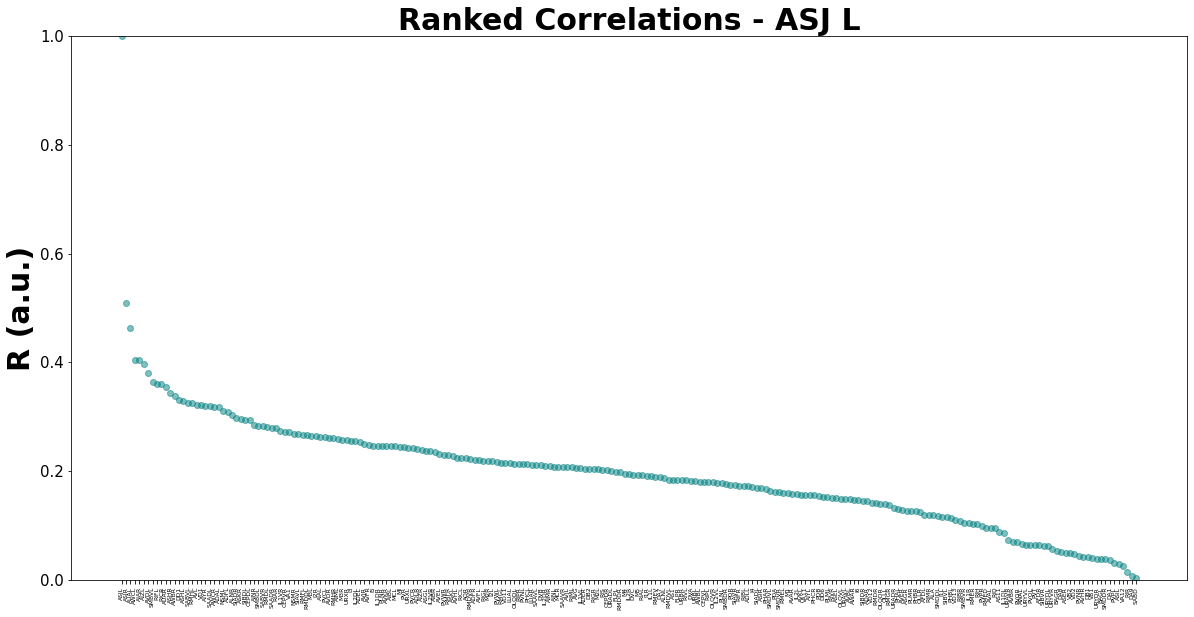

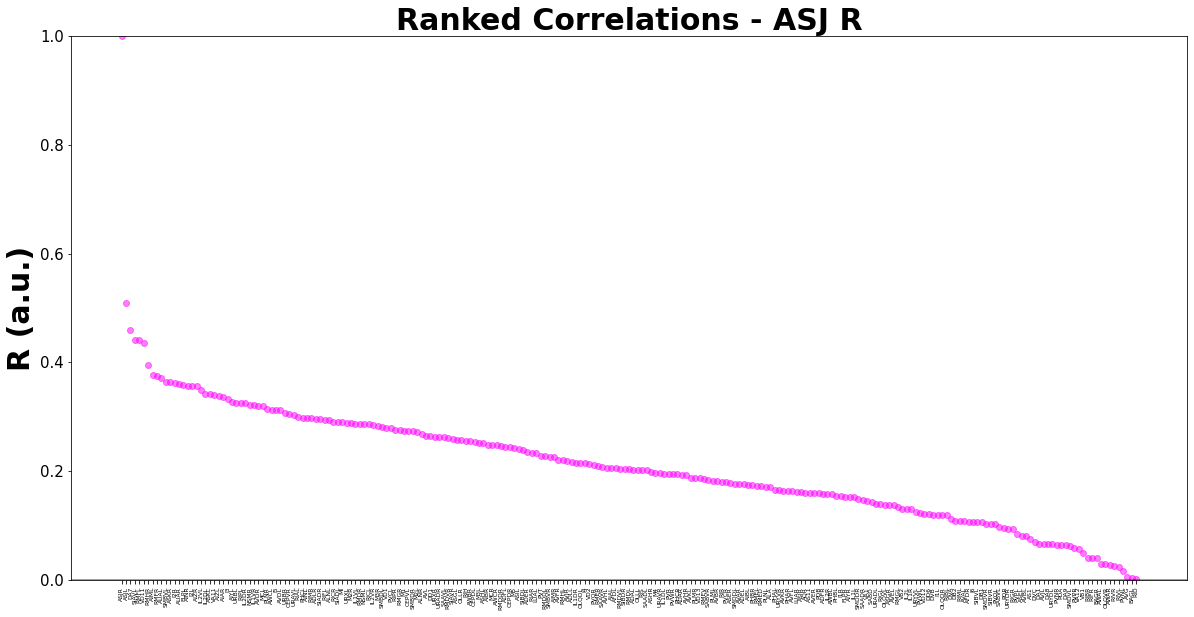

In [38]:
## This is just plotting the absolute value medians ##

fig, ax = plt.subplots(1,1, figsize=(20,10), facecolor='w') #this establishes the plotting
ax.set_title('Ranked Correlations - ASJ L', fontsize=30, weight='bold') #title
ax.plot(rank_ASJ_L_names, rank_ASJ_L_meds, 'o', color='teal', alpha=0.5)
plt.xticks(rotation=90) 
ax.set_ylabel('R (a.u.)', fontsize=30, weight='bold')
ax.tick_params(axis= 'y', labelsize=15)
ax.tick_params(axis= 'x', labelsize=6)
ax.set_ylim([0,1])
#plt.savefig('031424 ASJ L Ranked Correlations.png') #here you can save your figure


fig, ax = plt.subplots(1,1, figsize=(20,10), facecolor='w')
ax.set_title('Ranked Correlations - ASJ R', fontsize=30, weight='bold')
ax.plot(rank_ASJ_R_names, rank_ASJ_R_meds, 'o', color='fuchsia', alpha=0.5)
plt.xticks(rotation=90)
ax.set_ylabel('R (a.u.)', fontsize=30, weight='bold')
ax.tick_params(axis= 'y', labelsize=15)
ax.tick_params(axis= 'x', labelsize=6)
ax.set_ylim([0,1])
plt.axhline(y=0, color='black', alpha=0.5)
#plt.savefig('031424 ASJ R Ranked Correlations.png')
    

In [ ]:
## If you want to plot individual traces, proceed below

In [49]:
# Here I wanted to color-code the stimuli that was delivered since it is randomized 
# This will help you organize the data based on stimuli that was delivered

print(head1['stims'])
# 1 = butanone = paleturquoise
# 2 = pentanedoine = pink
# 3 = NaCl = yellow

color1 = []
color2 = []
color3 = []

for i in head1['stims']:
    if i[0] == 1:
        color1.append('paleturquoise')
    if i[0] == 2:
        color1.append('pink')
    if i[0] == 3:
        color1.append('yellow')
        
    if i[1] == 1:
        color2.append('paleturquoise')
    if i[1] == 2:
        color2.append('pink')
    if i[1] == 3:
        color2.append('yellow')
        
    if i[2] == 1:
        color3.append('paleturquoise')
    if i[2] == 2:
        color3.append('pink')
    if i[2] == 3:
        color3.append('yellow')

print(color1)

NameError: name 'mat1' is not defined

In [ ]:
# to find out frame times I converted seconds to frames
# second (x) * 4 = frame (y)
# I got the number 4 because it was the frames per second they said
# You can find out frames per second by: mat1['fps']
# This was useful because in mat1['stim_times'] they list what SECOND times they pulsed stimuli
# So I had to figure out what FRAME time I needed to color-code
# For example, 60.5 second stimulus pulse equals 242 frames (see below numbers for ax.axvspan, 242-282)

/var/folders/h2/nr_g6r3s37v0y4h9l4yjz0bw0000gn/T/ipykernel_7067/2379478997.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1,1, figsize=(15,10), facecolor='w')


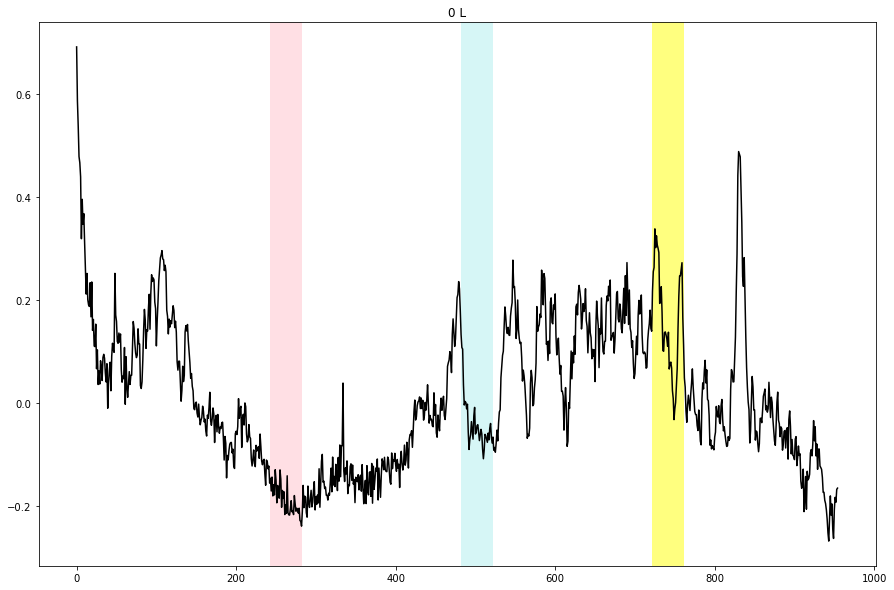

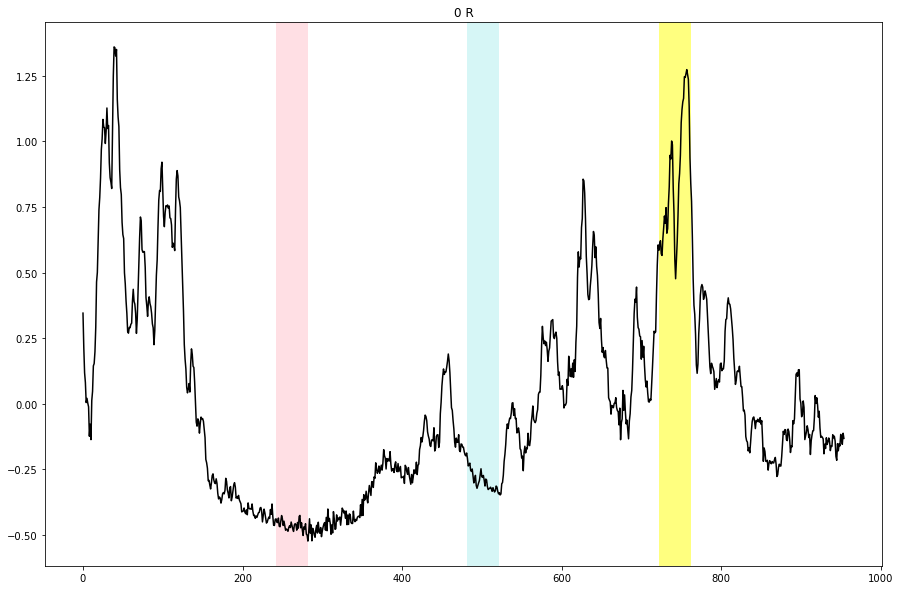

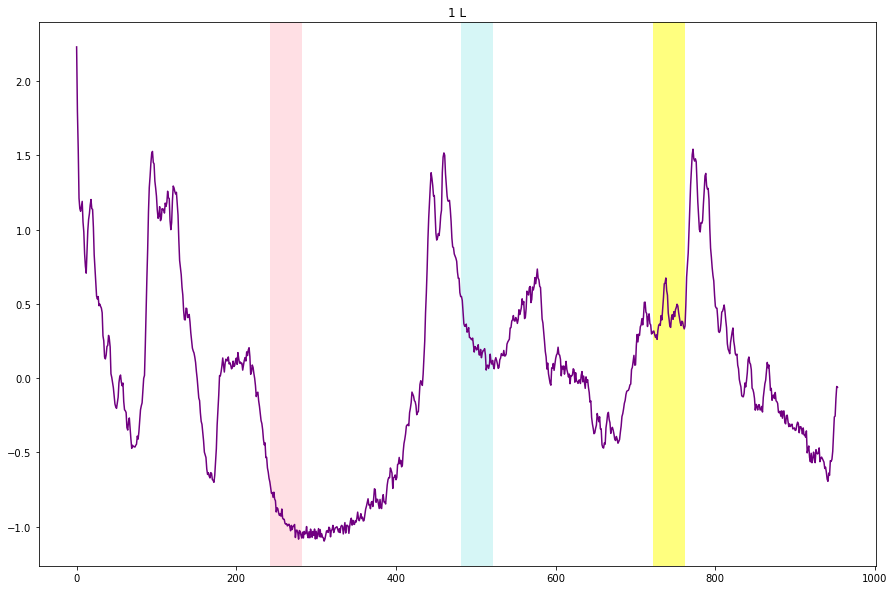

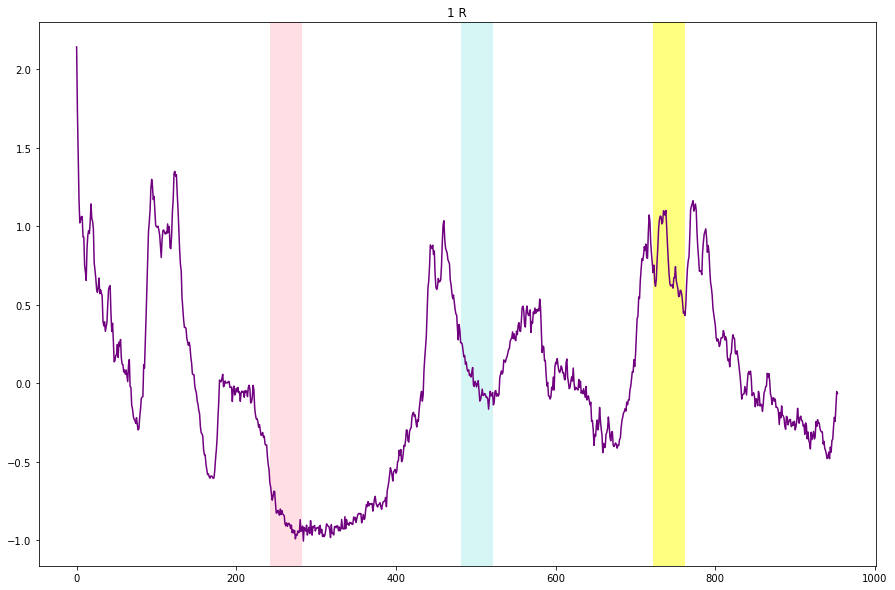

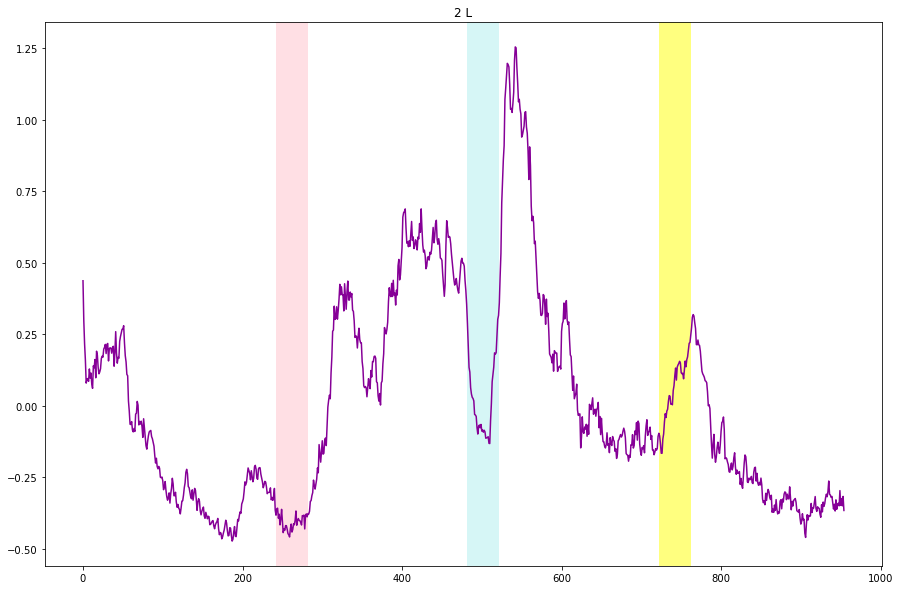

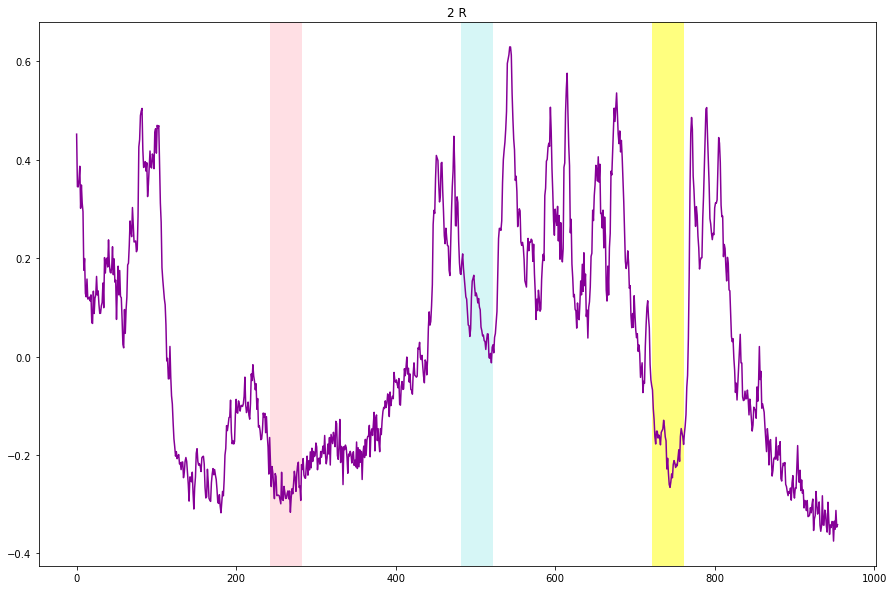

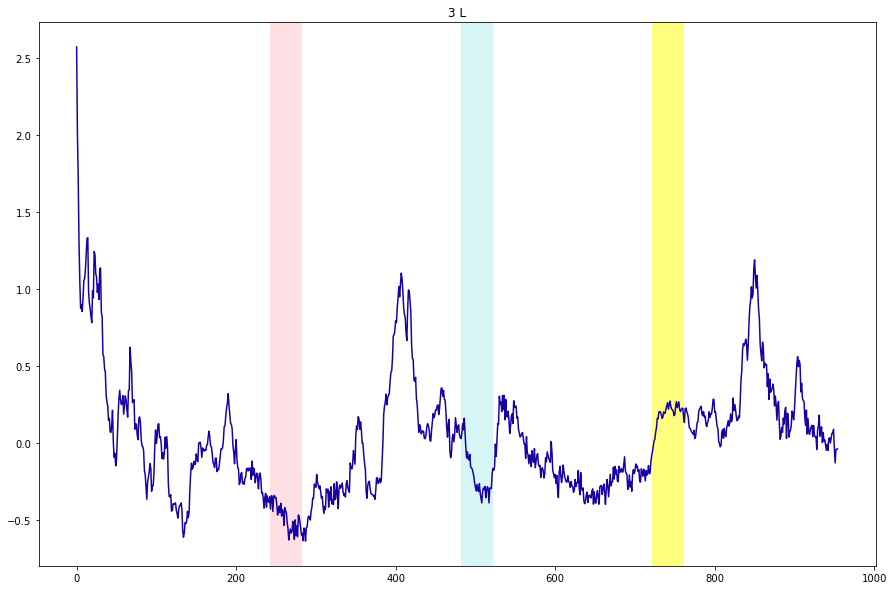

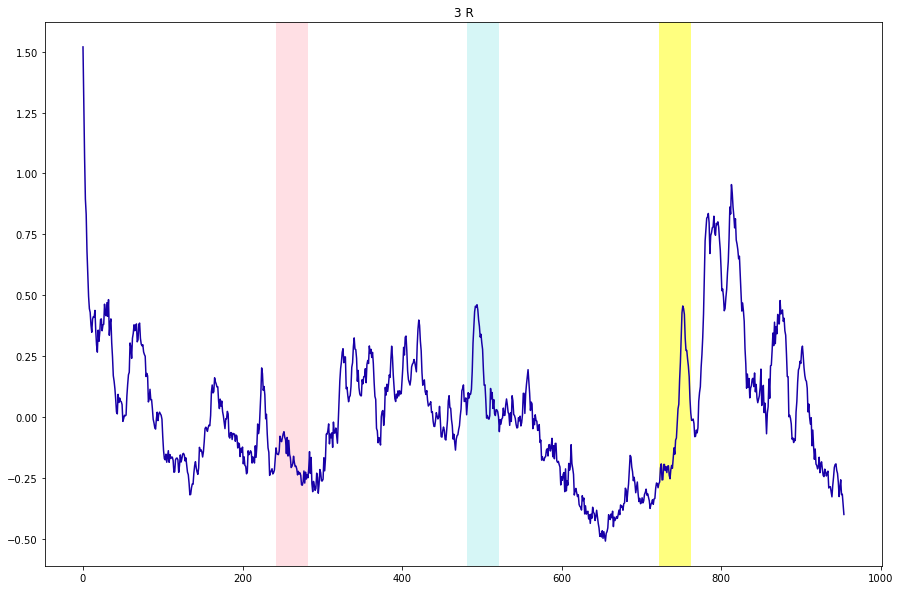

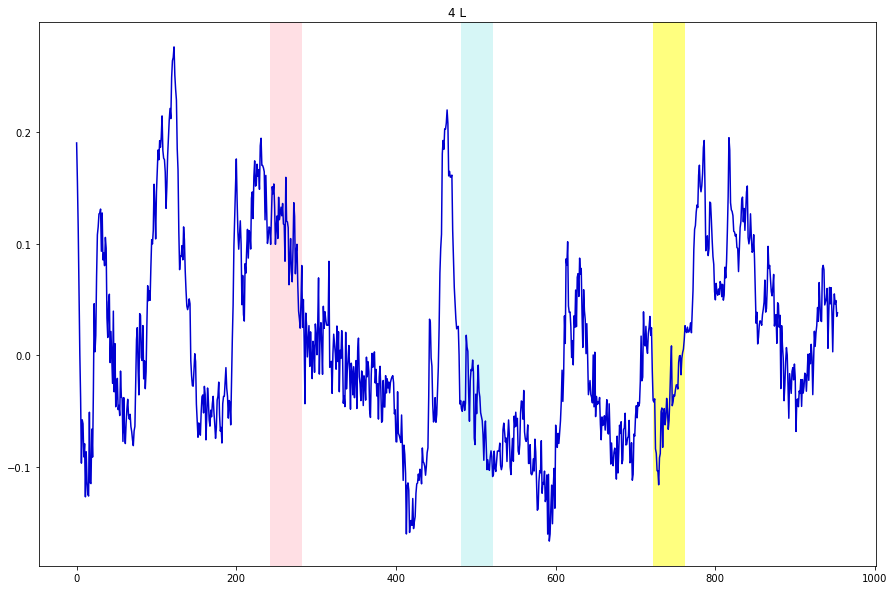

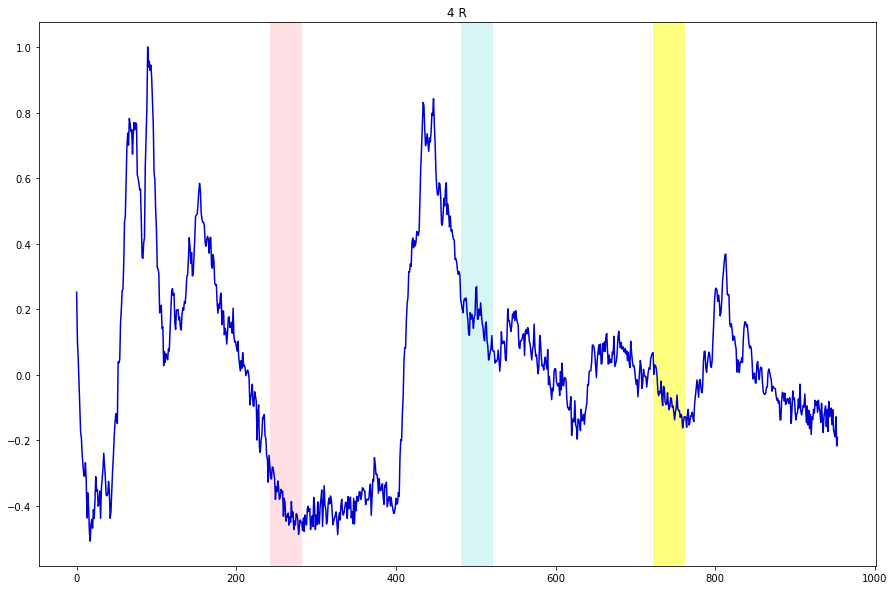

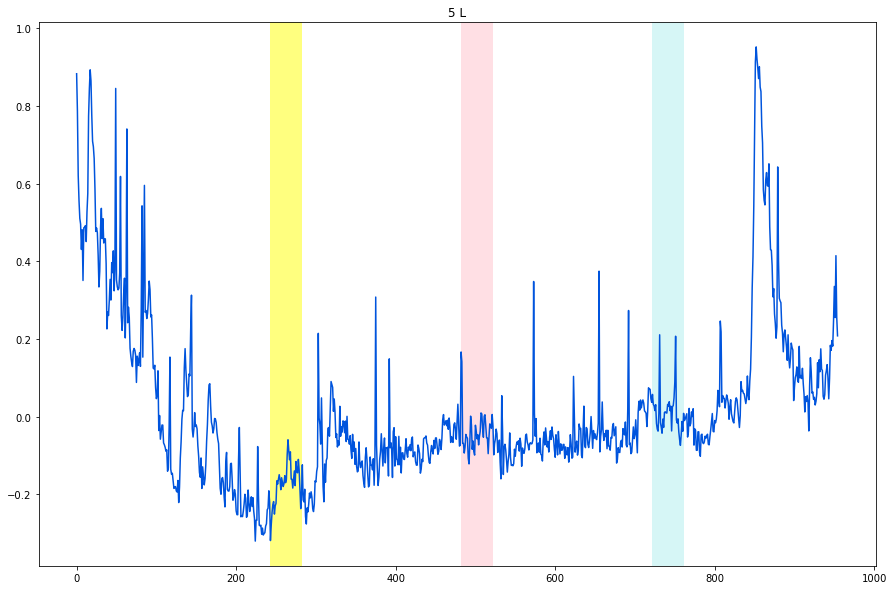

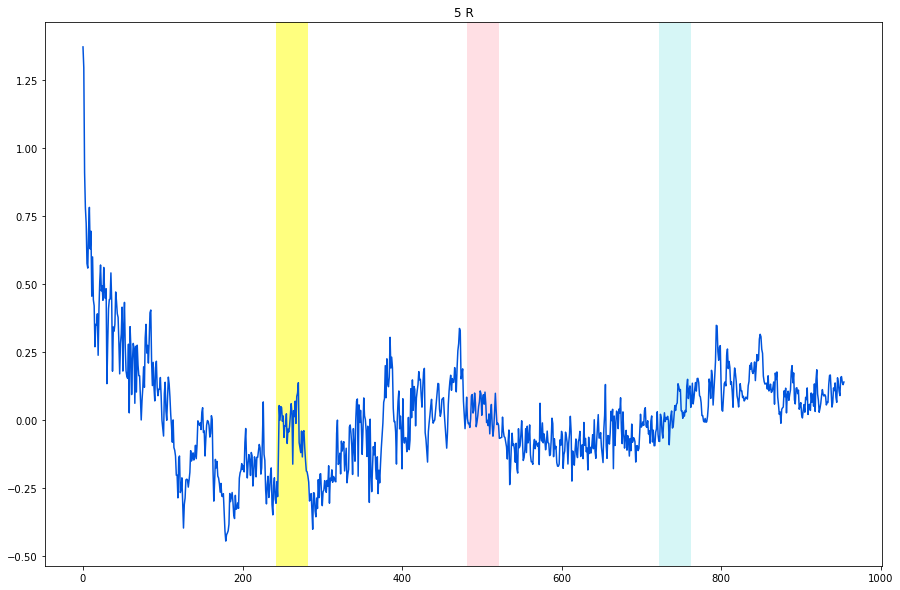

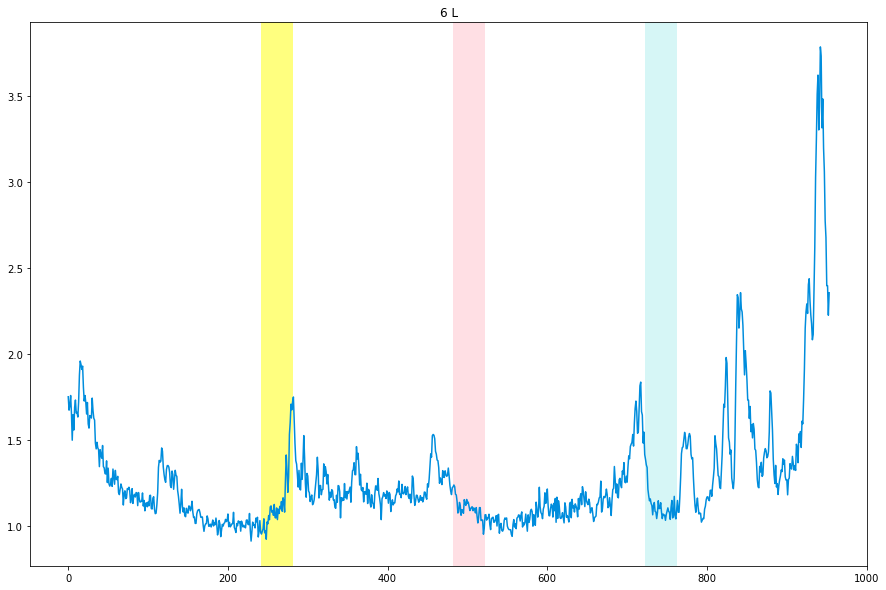

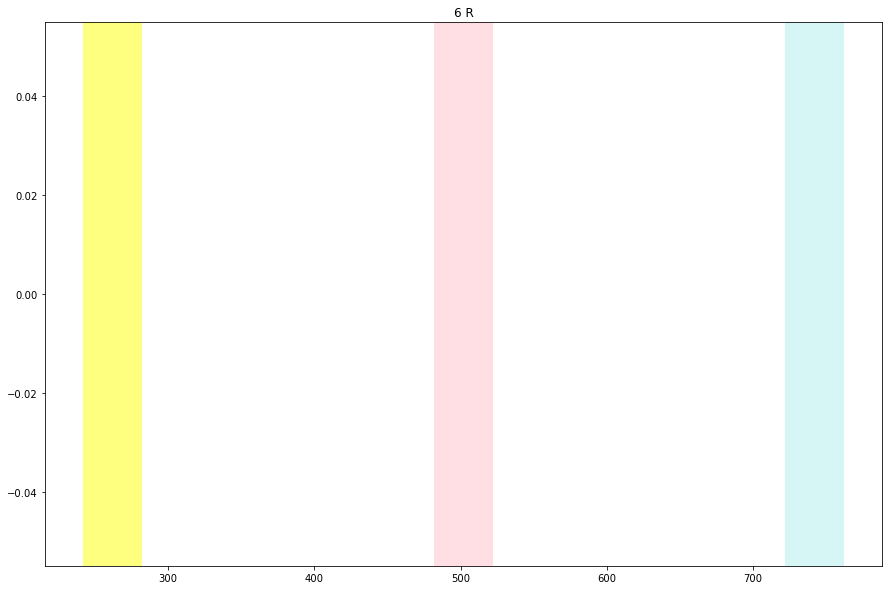

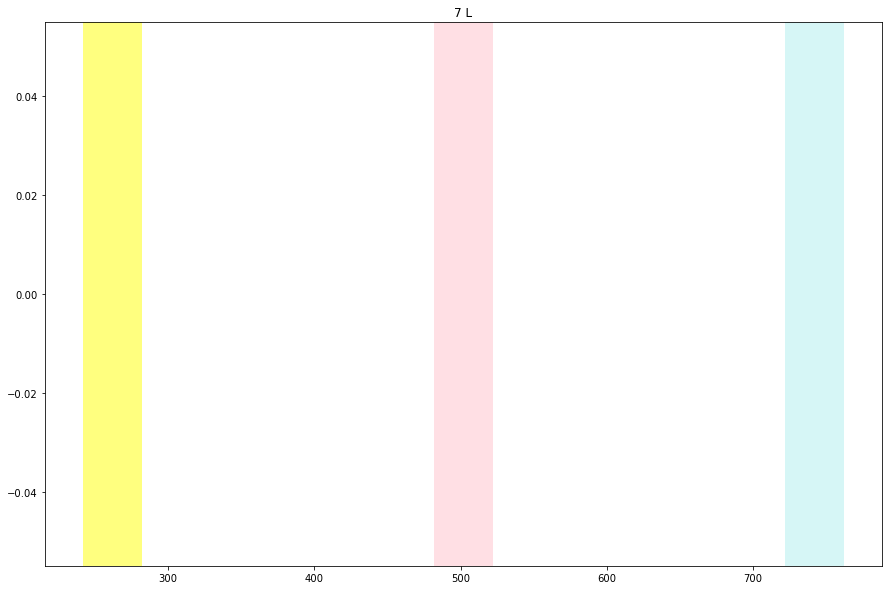

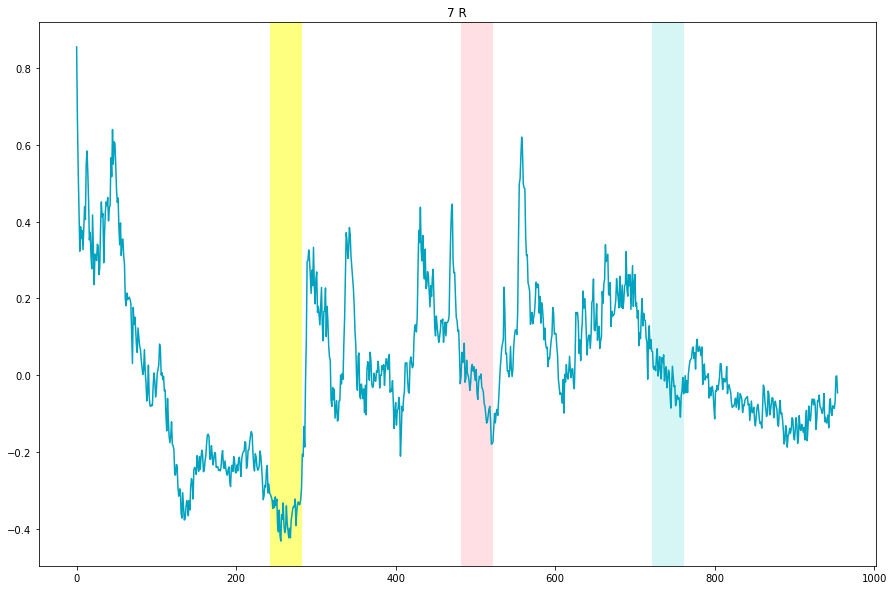

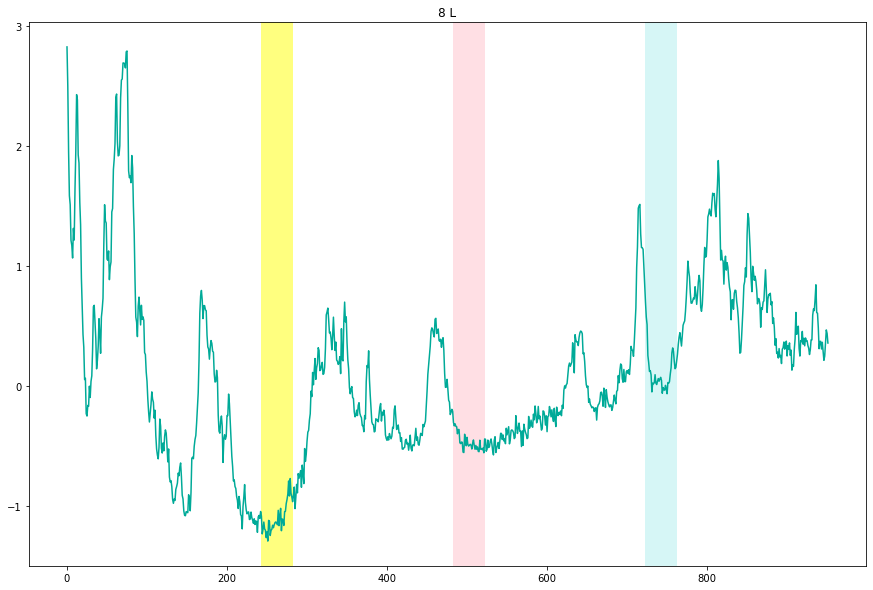

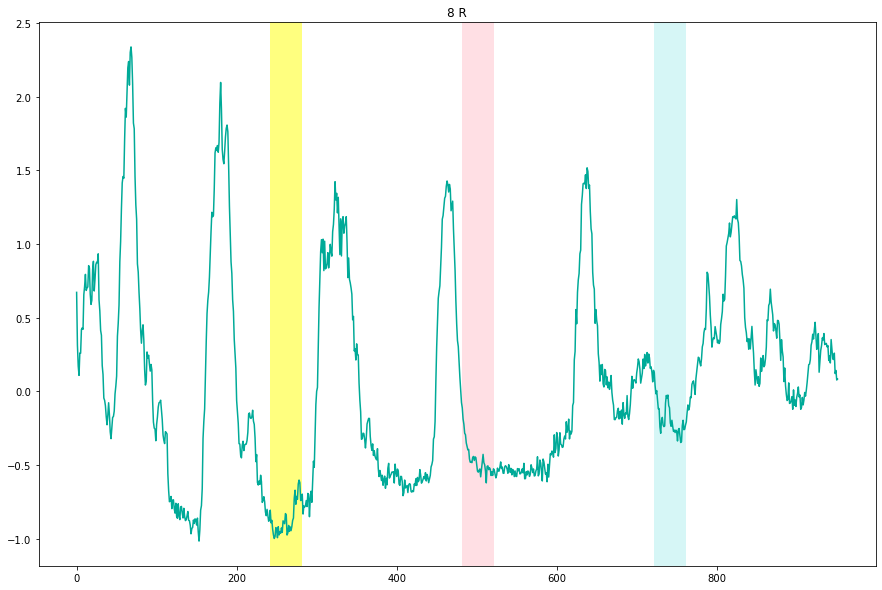

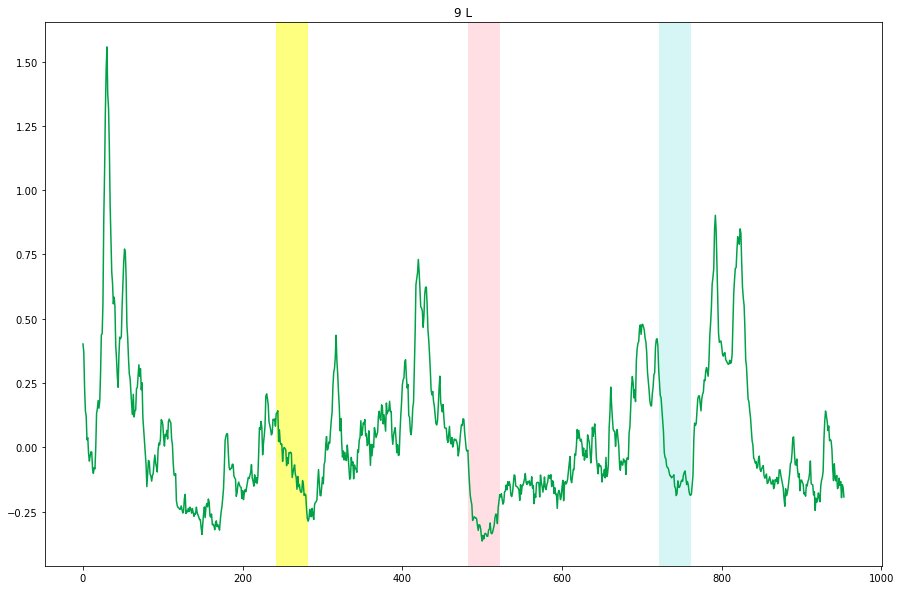

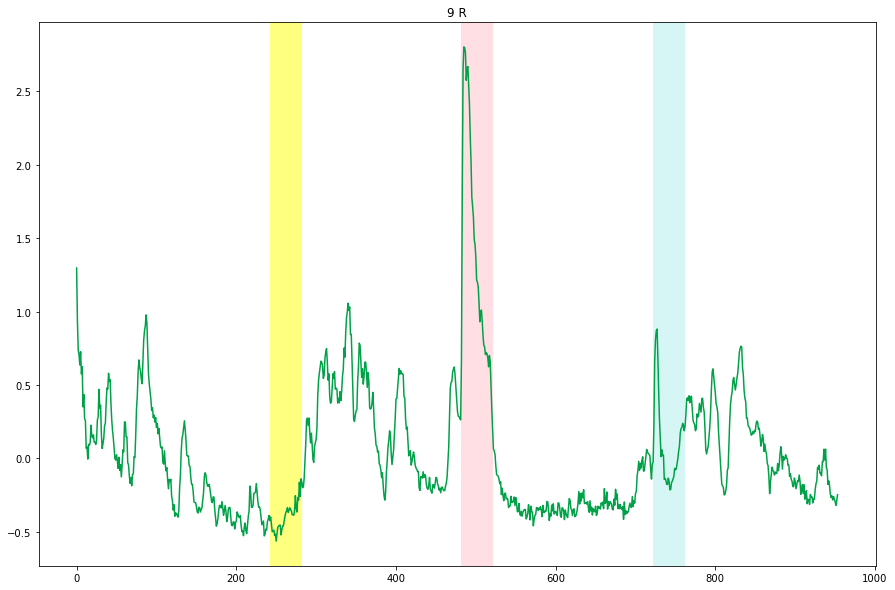

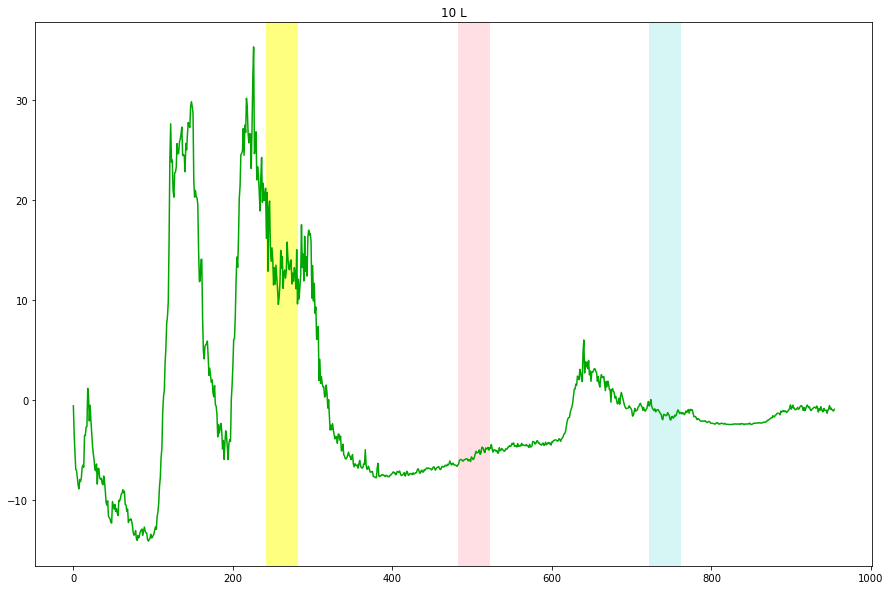

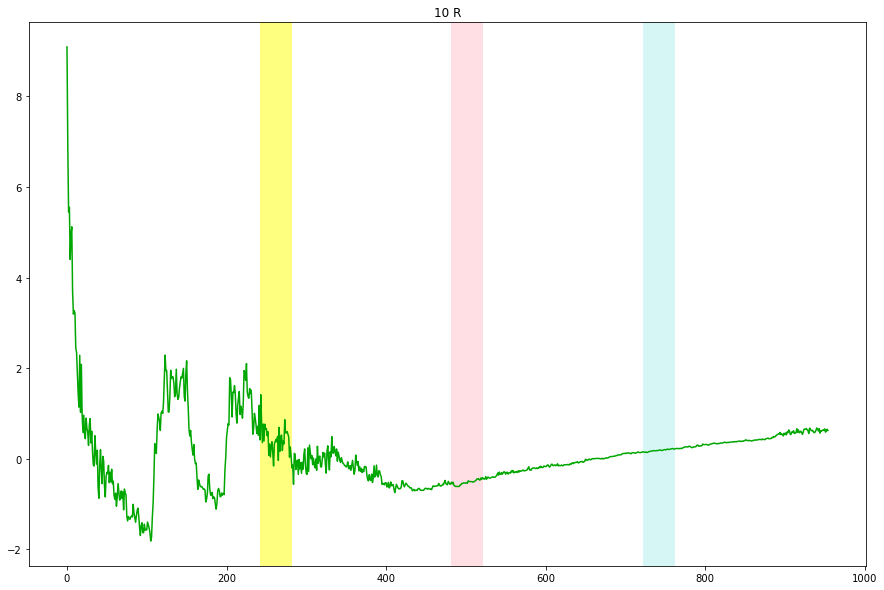

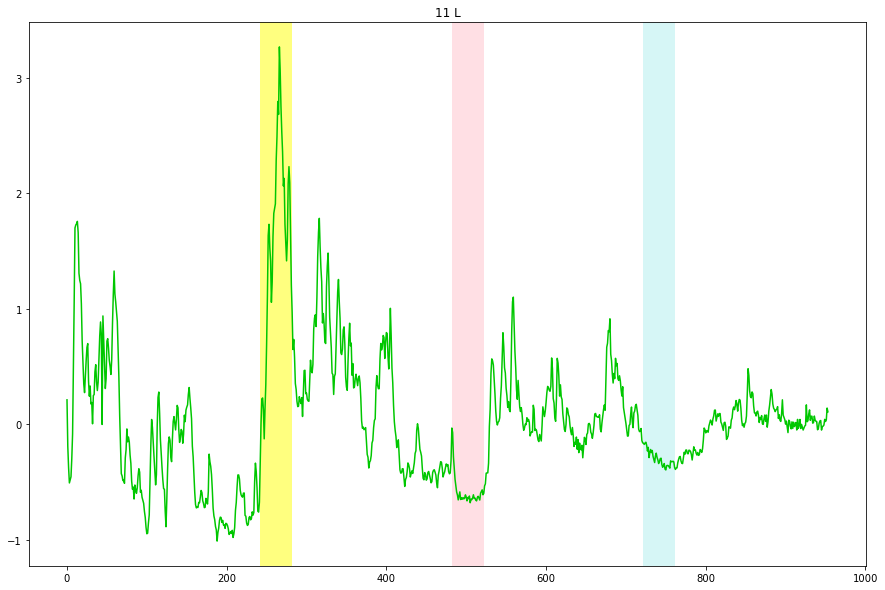

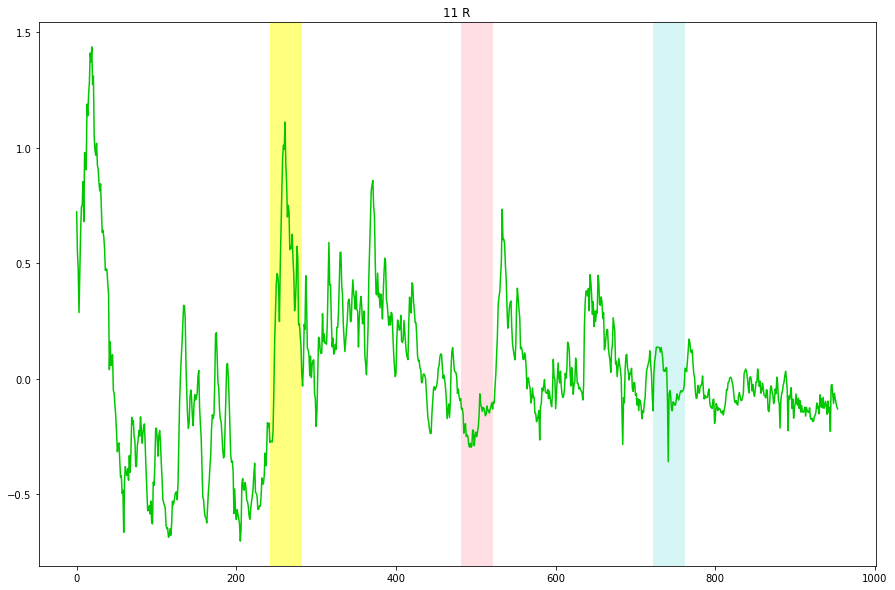

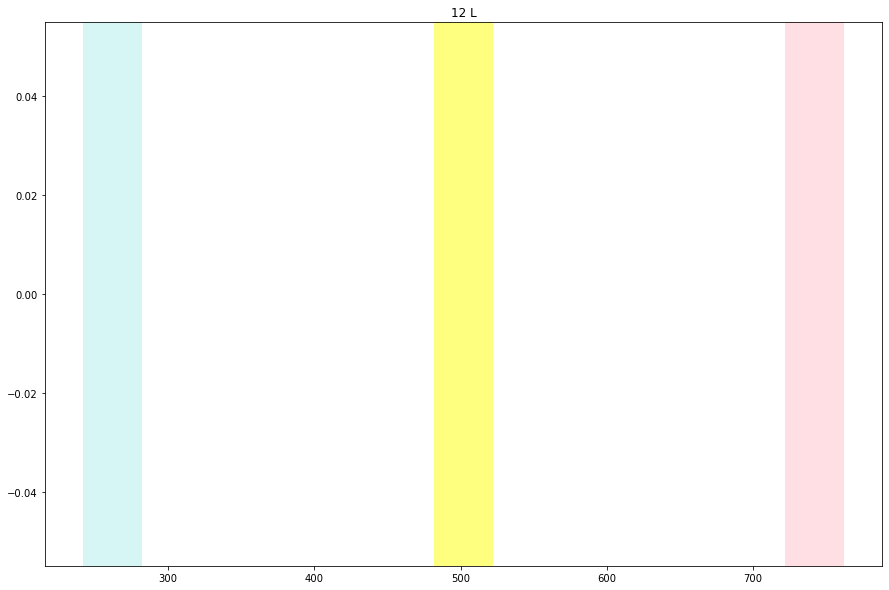

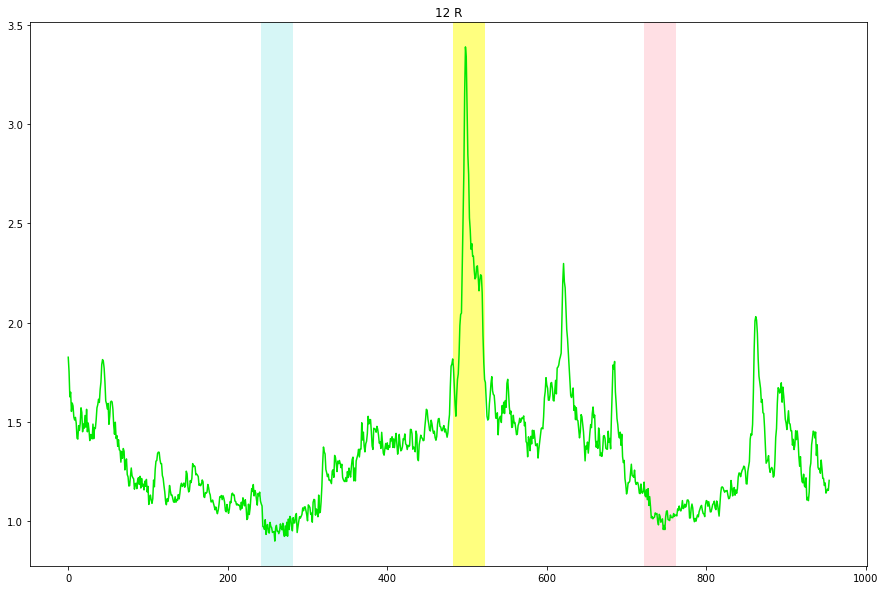

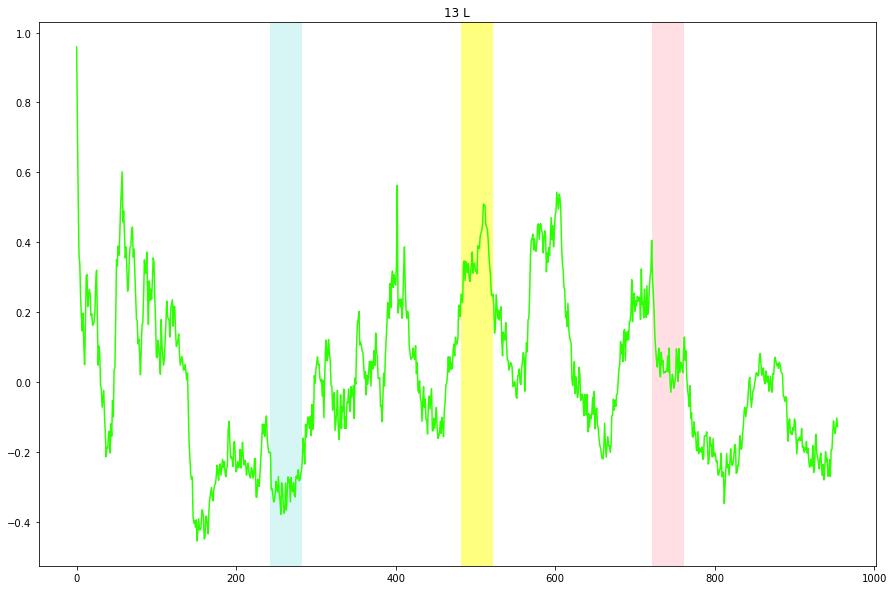

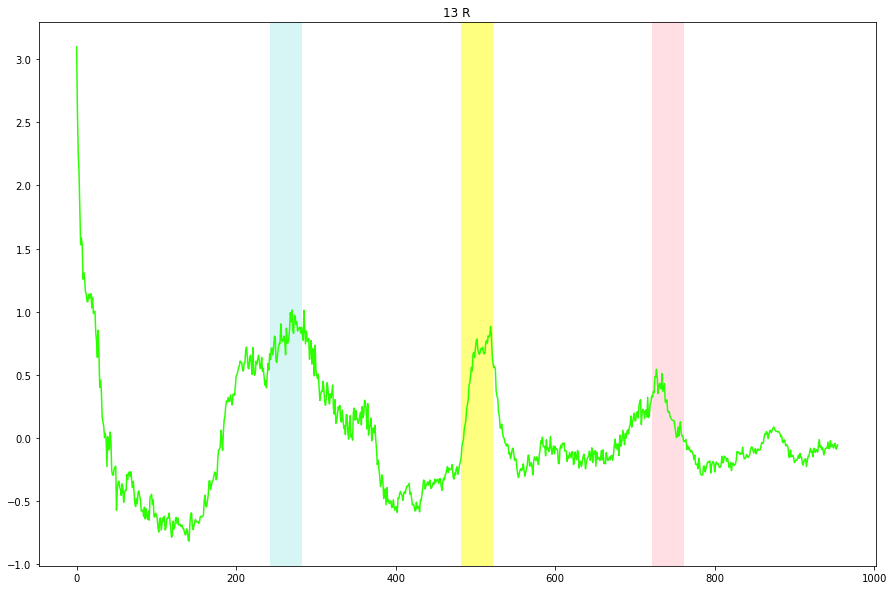

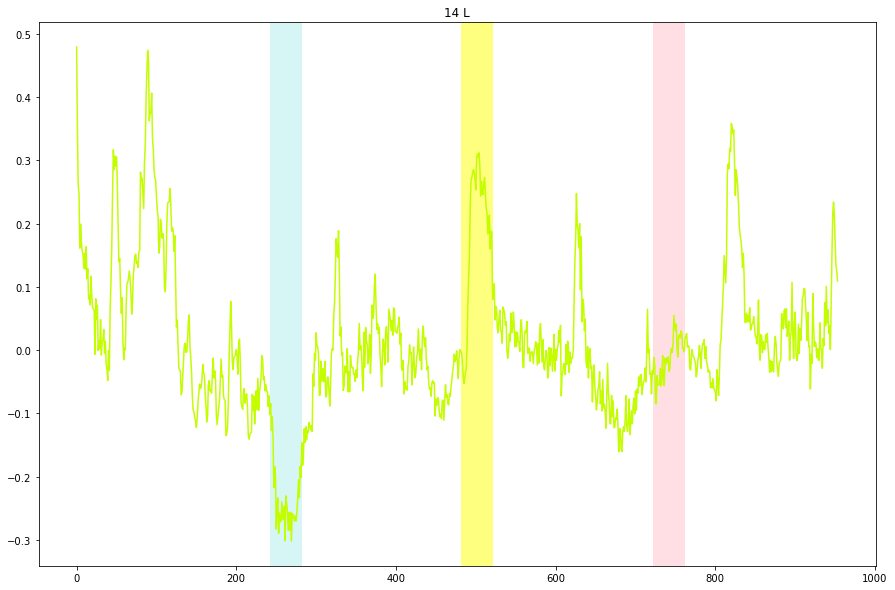

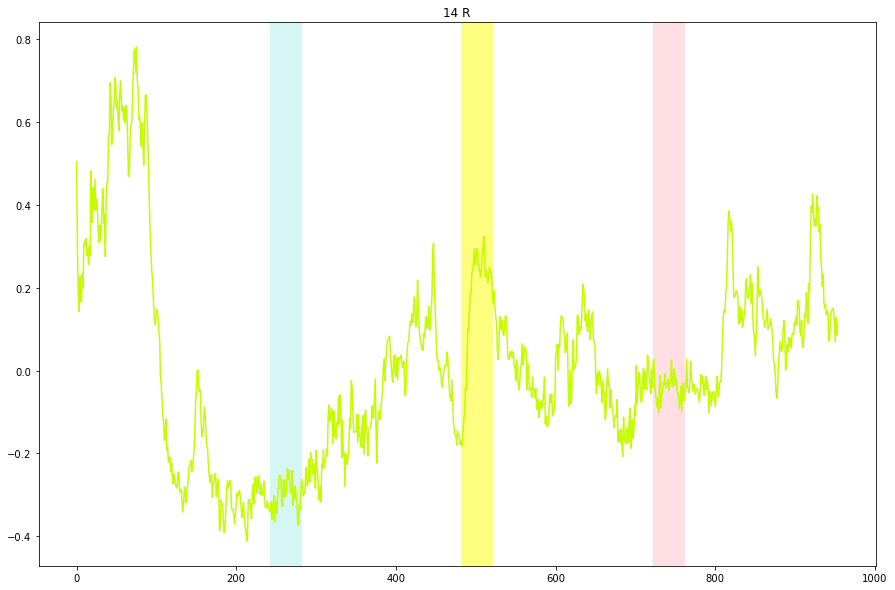

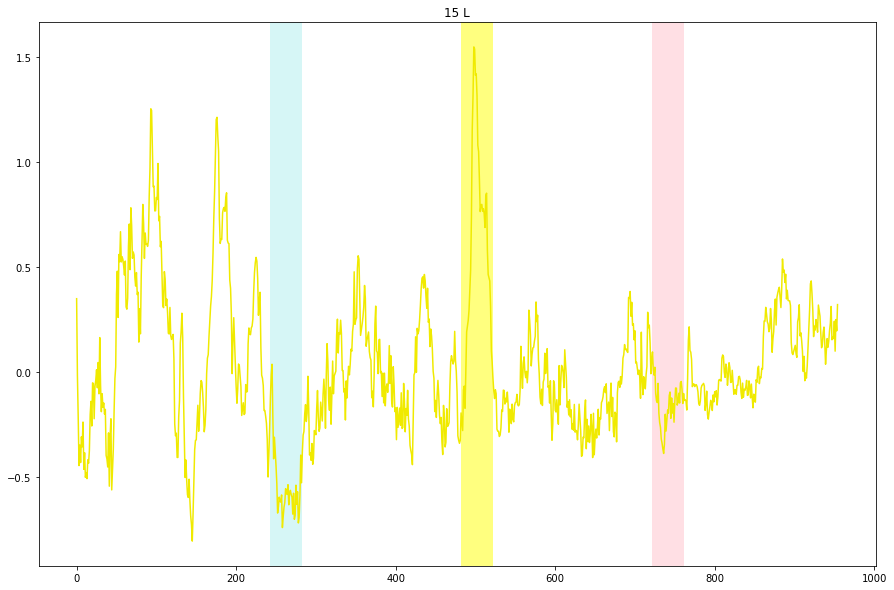

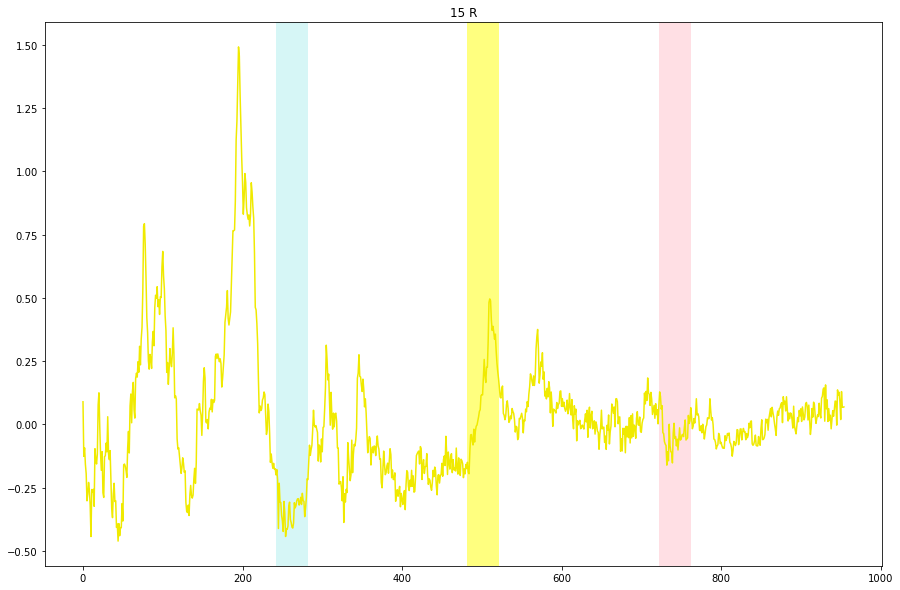

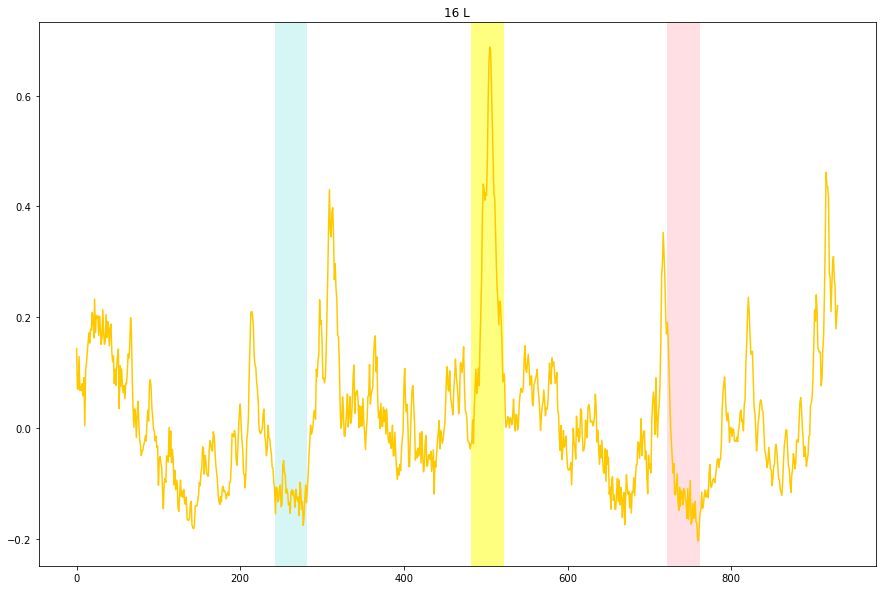

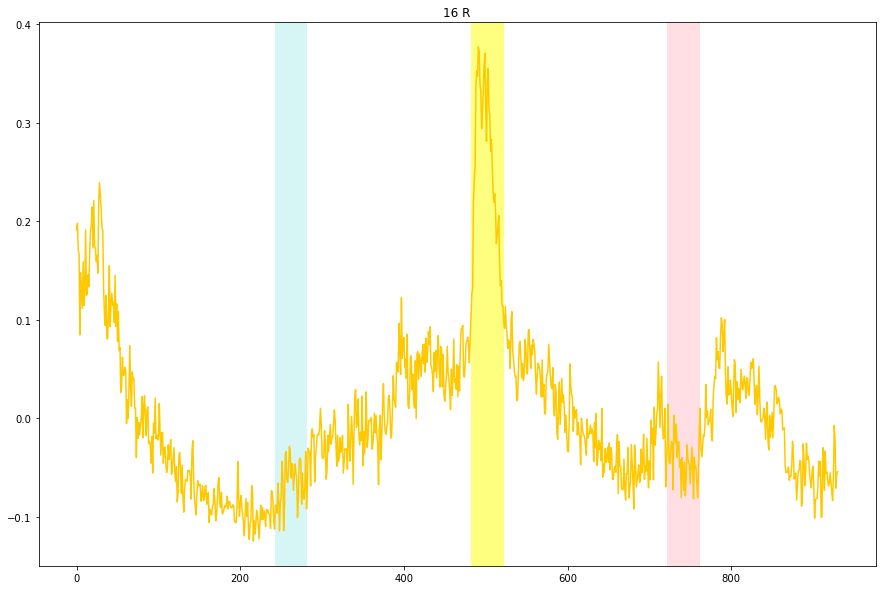

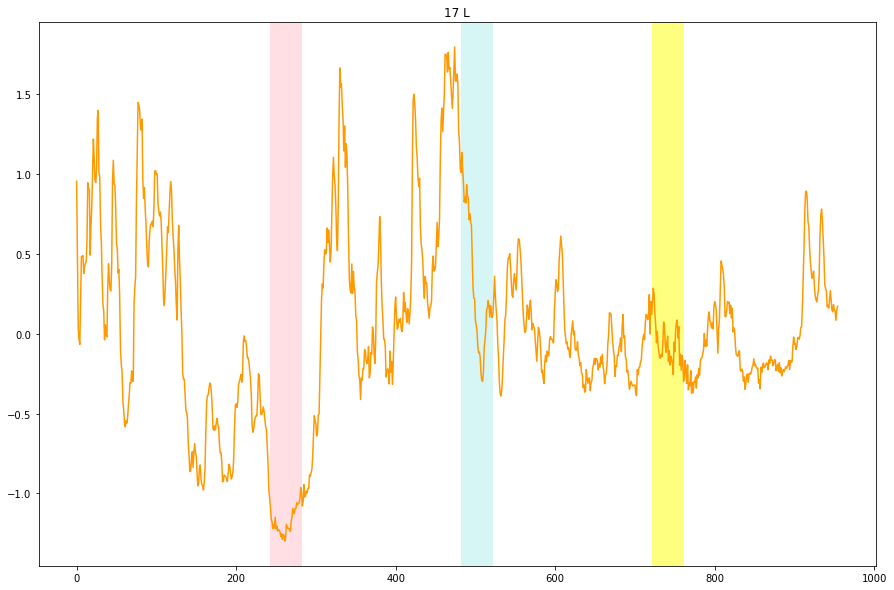

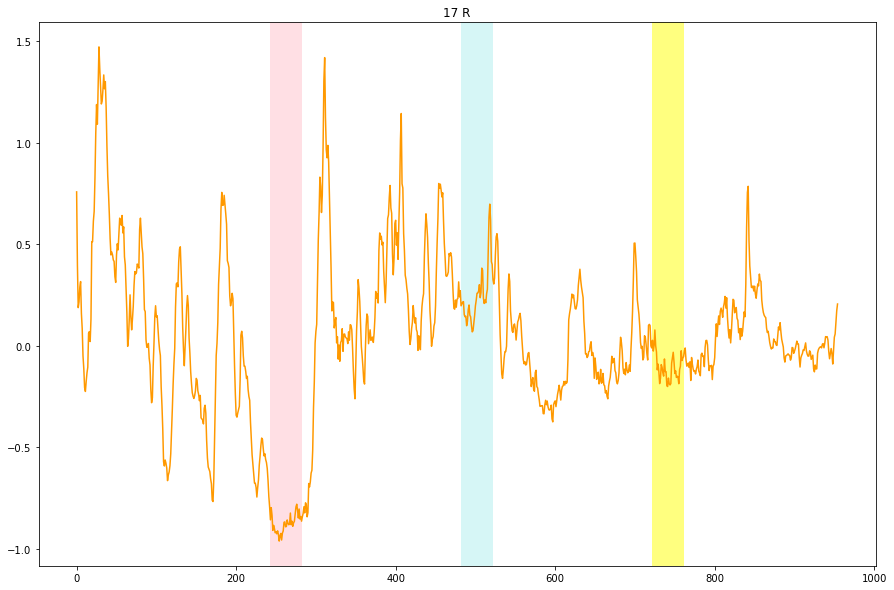

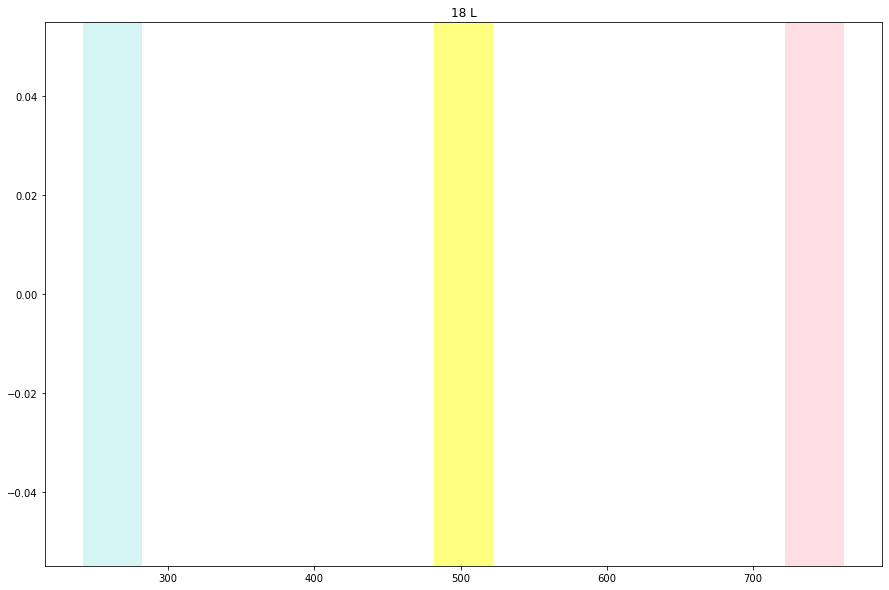

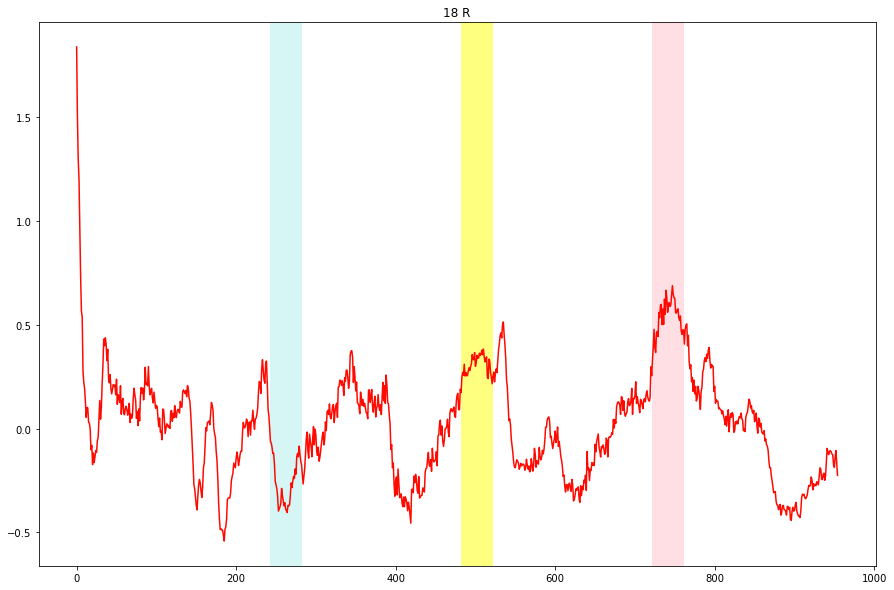

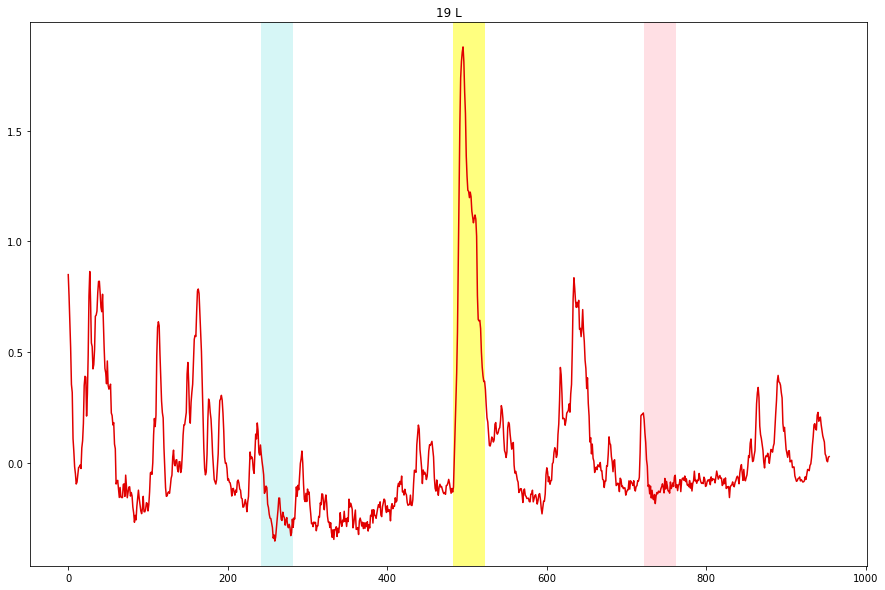

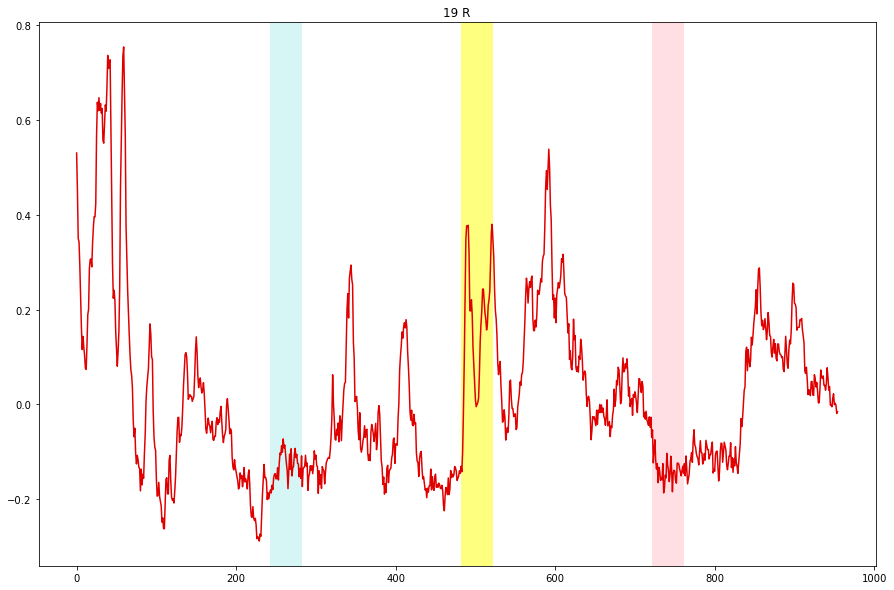

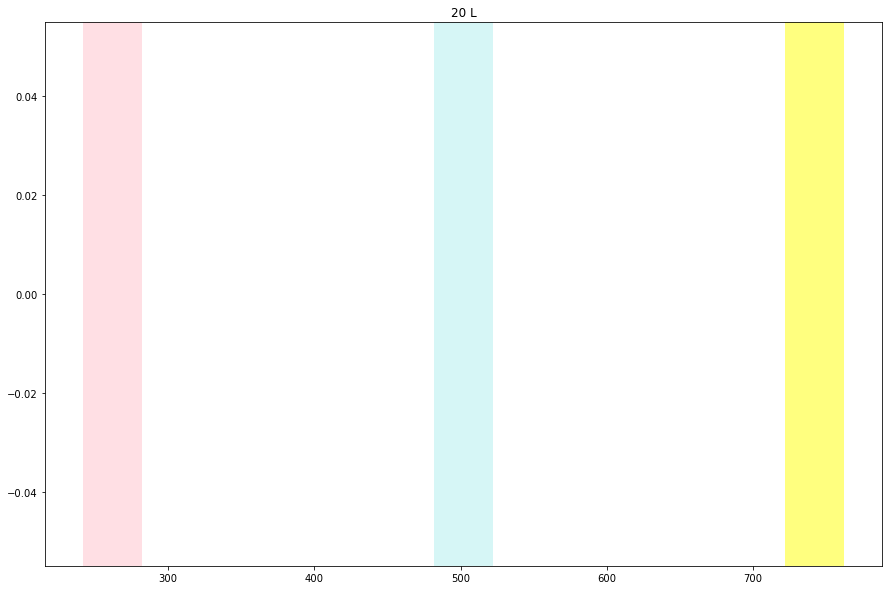

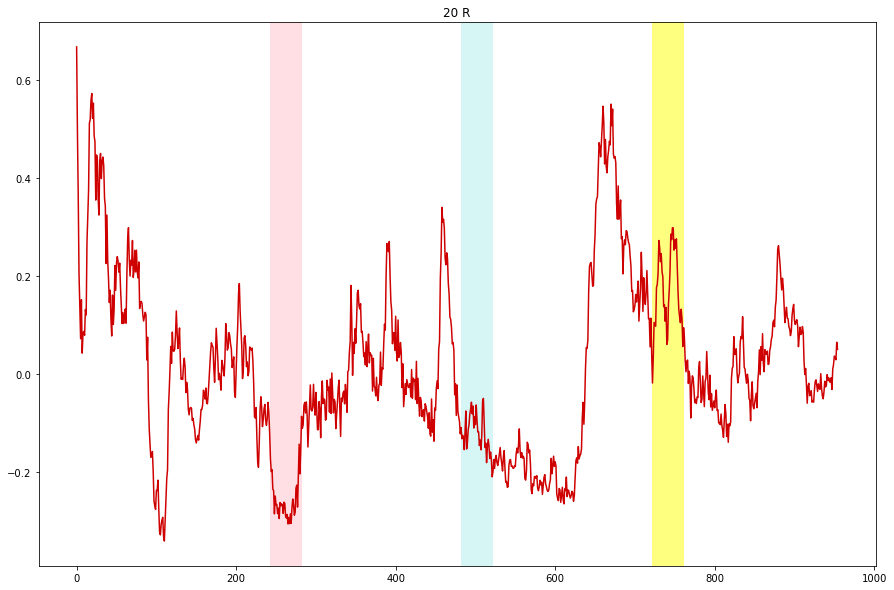

In [59]:
cmap = plt.get_cmap('nipy_spectral') #this is just to get that rainbow color effect for plotting the traces
#if you notice below for color = cmap(i * 12), this is because I wanted to space out the colors more to go from
# a wider range of rainbow colors
# you can google 'matplotlib colormap reference' for more info and a list of other colors. 
# I used 'nipy_spectral' to get a rainbow effect because it was pretty :) lol

count = 0
for i in range(0,21): #21 is because there's 21 trials
    fig, ax = plt.subplots(1,1, figsize=(15,10), facecolor='w') 
    ax.set_title(str(i) + ' L') #this is how I label each trial from 0-21 by using i
    ax.plot(ASJ_L[i], color = cmap(i*12)) 
    ax.axvspan(242, 282, facecolor=color1[i], alpha = 0.5) 
    ax.axvspan(482, 522, facecolor=color2[i], alpha = 0.5) 
    ax.axvspan(722, 802, facecolor=color3[i], alpha = 0.5)
    
    fig, ax = plt.subplots(1,1, figsize=(15,10), facecolor='w') 
    ax.set_title(str(i) + ' R')
    ax.plot(ASJ_R[i], color = cmap(i*12))
    ax.axvspan(242, 282, facecolor=color1[i], alpha = 0.5)
    ax.axvspan(482, 522, facecolor=color2[i], alpha = 0.5)
    ax.axvspan(722, 802, facecolor=color3[i], alpha = 0.5)
    count += 1